# 온라인 이커머스 데이터 
- 데이터 전처리
- RFM
- 고객 세그먼테이션
- 고객별 등급 분석 
- 클러스터링
- 빈도 주기 예측
- 머신러닝 (모든 모델 활용) 
- 고객 행동 예측: 특정 고객이 향후 어떤 물품을 구매할 가능성이 높은지 예측.
- 주문 금액 예측: 미래의 고객 주문 금액을 예측.
- 물품 수요 예측: 특정 물품의 향후 수요를 예측.
- 다중회귀분석을 통해 고객의 미래 구매 행동 예측 할 수 있음



(딥러닝)
- LSTM + GRU + TRANSFOMER 활용 시계열 데이터 분석
- CNN or 챗봇 

In [8]:
# 라이브러리 임포트 
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'  # 원하는 한글 폰트 이름으로 변경
plt.rcParams['axes.unicode_minus'] = False 

In [9]:
# https://archive.ics.uci.edu/dataset/352/online+retail
df = pd.read_excel('./Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 데이터 미리보기 및 요약

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [12]:
df.info
# Description, CustomerID 에 결측치가 있음 

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

InvoiceNo : 송장번호 
- 'c'로 시작하면 취소를 나타냄
Quantity : 이 코드가 마이너스로 시작하면 취소를 나타냄

In [13]:
# 기술통계
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [14]:
df.describe(exclude='number')
# 영국이 구매가 가장 많음 

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909.0,541909,540455,541909,541909
unique,25900.0,4070,4223,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,495478
mean,NaN,NaN,NaN,2011-07-04 13:34:57.156386048,NaN
min,NaN,NaN,NaN,2010-12-01 08:26:00,NaN
25%,NaN,NaN,NaN,2011-03-28 11:34:00,NaN
50%,NaN,NaN,NaN,2011-07-19 17:17:00,NaN
75%,NaN,NaN,NaN,2011-10-19 11:27:00,NaN
max,NaN,NaN,NaN,2011-12-09 12:50:00,NaN


## 결측치 처리

In [15]:
df.isnull().sum()
# customerId ? 왜 결측치가 많을까? -> 아마도 비회원 주문 건수가 많음  

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

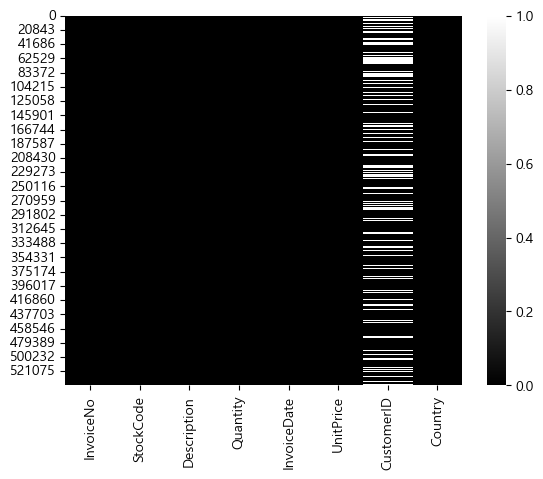

In [16]:
sns.heatmap(df.isnull(), cmap='gray')

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'InvoiceDate'}>],
       [<Axes: title={'center': 'UnitPrice'}>,
        <Axes: title={'center': 'CustomerID'}>]], dtype=object)

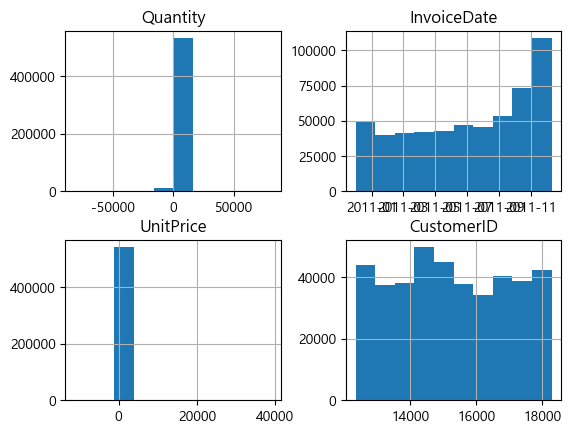

In [17]:
df.hist()

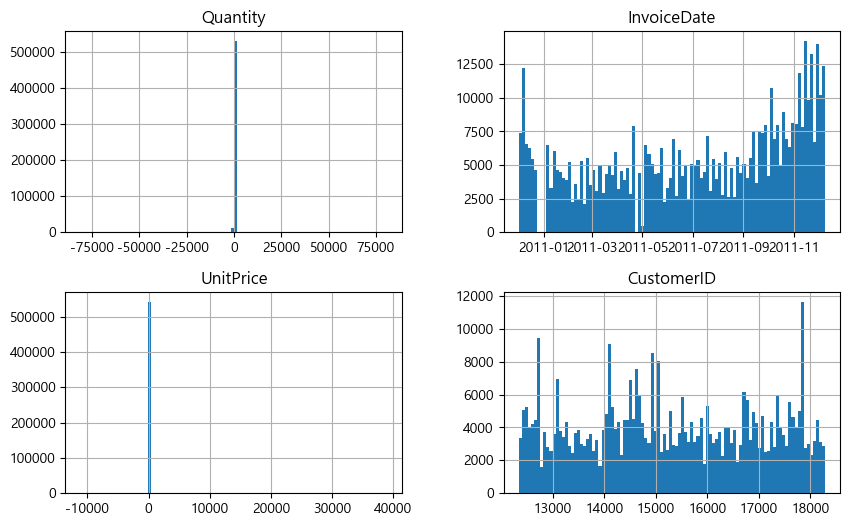

In [18]:
df.hist(figsize=(10,6), bins=100);
# Quantity & Unitprice 에서 이상치가 있다  

## 전체 주문금액 파생변수 만들기 
- 수량 x 금액으로 전체 금액 계산하기

In [19]:
# TotalPrice 는 RFM 중 MonetaryValue 값임 
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


## 거래일자 컬럼 만들기
- 활성화 고객 및 비활성화 고객 분석 

In [20]:
df.groupby('CustomerID')['InvoiceDate'].nunique()
# 고객별로 다른 날짜에 구매한 이력이 있음 

CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Name: InvoiceDate, Length: 4372, dtype: int64

In [21]:
# 거래 날짜를 datetime 형식으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Timestamp
max_timestamp = df['InvoiceDate'].max()
# 1일을 더하기
latest_date = max_timestamp + pd.Timedelta(days=1)

# 고객별 최신 구매 날짜 확인 
latest_date_per_customer = df.groupby('CustomerID')['InvoiceDate'].max()

# 현재일자와 차이 
diffDays = latest_date - latest_date_per_customer

# 'CustomerID'에 해당하는 diffDays 컬럼 추가 
df = df.merge(diffDays.rename('diffDays'), on='CustomerID', how='left')

# 날짜 차이만 남기기 위해 days 속성만 추출
df['diffDays'] = df['diffDays'].dt.days

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,diffDays
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,302.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0


In [22]:
df['diffDays'].describe()

count    406829.000000
mean         39.954140
std          64.686233
min           1.000000
25%           4.000000
50%          16.000000
75%          41.000000
max         374.000000
Name: diffDays, dtype: float64

In [23]:
df['diffDays'].isnull().sum()
# 비회원은 diffDays 산정하기 어려움 

135080

## 회원 vs 비회원 구매 

In [24]:
# 회원 및 비회원 구매 비율 확인 
df['CustomerID'].notnull().value_counts(normalize=True)

CustomerID
True     0.750733
False    0.249267
Name: proportion, dtype: float64

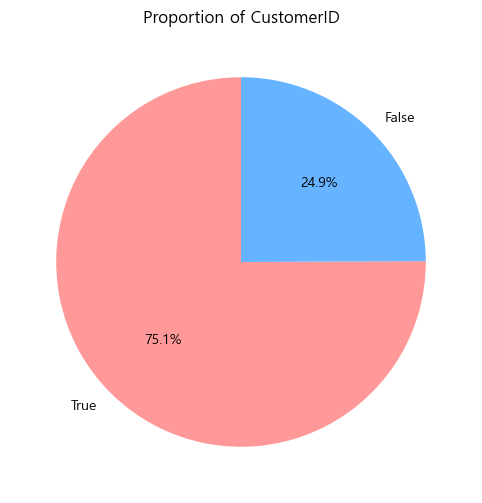

In [25]:
series = df['CustomerID'].notnull().value_counts(normalize=True)

# 색상 리스트 지정
colors = ['#ff9999','#66b3ff']  # 원하는 색상 코드 리스트

# 원형 플롯 그리기
plt.figure(figsize=(8, 6))  # 플롯의 크기 설정
series.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)

# 추가적인 설정
plt.title('Proportion of CustomerID')  # 제목 설정
plt.ylabel('')  # y축 레이블 제거

# 플롯 보여주기
plt.show()

In [26]:
# CustomerID 가 결측치가 아닌 컬럼의 Country 빈도수 구하기 

df[df['CustomerID'].notnull()]['Country'].value_counts()

Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [27]:
# 회원가입 유무 파생변수 만들기 
df['isRegistered'] = df['CustomerID'].notnull()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,diffDays,isRegistered
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,302.0,True
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,302.0,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,True


In [28]:
# 회원 가입 유무에 대한 국가별 차이 분석 
pd.crosstab(df['Country'], df['isRegistered']).sort_values(True, ascending=False)

# 영국 > 독일 > 프랑스 순으로 회원가입 비율이 높음 

isRegistered,False,True
Country,,
United Kingdom,133600,361878
Germany,0,9495
France,66,8491
EIRE,711,7485
Spain,0,2533
Netherlands,0,2371
Belgium,0,2069
Switzerland,125,1877
Portugal,39,1480


## 구매 취소비율 

In [29]:
# 구매취소는 invoiceNo 가 'c' 로 되어 있는 경우 구매 취소 비율임 

# 인보이스 넘버에서 먼저 숫자를 제거 
df['InvoiceNo'].str.replace(r"[0-9]", " ", regex=True).value_counts()

InvoiceNo
C          9288
A             3
Name: count, dtype: int64

In [30]:
# df 컬럼에 구매 취소 유무 추가 
df['InvoiceCode'] = df['InvoiceNo'].str.replace(r"[0-9]", " ", regex=True)
df['isCancel'] = df['InvoiceCode'] == 'C'
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,diffDays,isRegistered,InvoiceCode,isCancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,302.0,True,NaN,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,True,NaN,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,302.0,True,NaN,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,True,NaN,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,True,NaN,False


In [31]:
df['InvoiceCode'].replace(np.nan, " ", inplace=True)

In [32]:
df['InvoiceCode']

0          
1          
2          
3          
4          
         ..
541904     
541905     
541906     
541907     
541908     
Name: InvoiceCode, Length: 541909, dtype: object

In [33]:
# 회원가입 유무 중 구매 취소 건수 확인 

test = pd.crosstab(df['isRegistered'], df['InvoiceCode'])
test

InvoiceCode,,A,C
isRegistered,,,
False,134694,3,383
True,397924,0,8905


## 고객 ID 가 없는 주문과 취소 주문은 제외 

In [34]:
df.shape

(541909, 13)

In [35]:
df['CustomerID'].notnull()
# 고객ID에 결측치가 없음 

0         True
1         True
2         True
3         True
4         True
          ... 
541904    True
541905    True
541906    True
541907    True
541908    True
Name: CustomerID, Length: 541909, dtype: bool

In [36]:
df[df['Quantity'] > 0]
# 주문수량이 0보다 큼 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,diffDays,isRegistered,InvoiceCode,isCancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,302.0,True,,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,True,,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,302.0,True,,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,True,,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,True,,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,1.0,True,,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,1.0,True,,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,1.0,True,,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,1.0,True,,False


In [37]:
# 주문수량이 0보다 작은 인보이스 코드 필터링 
df.loc[df['Quantity'] < 0, 'InvoiceCode'].value_counts()

# 숫자만 있는 코드가 1336개임 

InvoiceCode
C          9288
           1336
Name: count, dtype: int64

In [38]:
df.loc[ (df['InvoiceCode'] != 'C      ') & (df['Quantity'] < 0) ]
# 구매수량은 음수이지만, 구매취소건이 아닌 것을 필터링하면, Description 이 NaN이 많음 -> 빼고 진행하는 게 나을거같음

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,diffDays,isRegistered,InvoiceCode,isCancel
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,-0.0,NaN,False,,False
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom,-0.0,NaN,False,,False
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,-0.0,NaN,False,,False
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,-0.0,NaN,False,,False
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom,-0.0,NaN,False,,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom,-0.0,NaN,False,,False
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom,-0.0,NaN,False,,False
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom,-0.0,NaN,False,,False
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom,-0.0,NaN,False,,False


In [39]:
df.loc[ (df['InvoiceCode'] != 'C      ') & (df['Quantity'] < 0) ]['Description'].value_counts()

Description
check                                  120
damages                                 45
damaged                                 42
?                                       41
sold as set on dotcom                   20
                                      ... 
POSSIBLE DAMAGES OR LOST?                1
MERCHANT CHANDLER CREDIT ERROR, STO      1
mystery! Only ever imported 1800         1
sold as 22467                            1
lost                                     1
Name: count, Length: 138, dtype: int64

In [40]:
df.loc[ (df['InvoiceCode'] != 'C      ') & (df['Quantity'] < 0), 'Quantity' ].describe()

# Quantity가 다 음수임 

count    1336.000000
mean     -154.907934
std       588.292456
min     -9600.000000
25%       -84.000000
50%       -30.000000
75%        -8.000000
max        -1.000000
Name: Quantity, dtype: float64

- 고객 ID 가 비회원 건 
- Invoice 가 취소건 , A 건 
- Invoice 가 취소건이 아니어도, 수량(Quantity) 가 음수면 
- Invoice 가 취소건이 아니어도, unit 수량이 음수인 것들 
- 다 제외하고 분석

- 현실세계라면 각 업무 담당자와 협의가 필요 

In [41]:
df.loc[df['CustomerID'].notnull() & (df['Quantity'] > 0) & (df['UnitPrice'] > 0), 'InvoiceCode'].value_counts()
# 인보이스 코드가 알파벳으로 들어있는게 없다 

InvoiceCode
     397884
Name: count, dtype: int64

In [42]:
df_valid = df[df['CustomerID'].notnull() & (df['Quantity'] > 0) & (df['UnitPrice'] > 0)].copy()
df.shape, df_valid.shape
# 50만건에서 39만으로 줄였음

((541909, 13), (397884, 13))

In [43]:
# 중복 데이터 제거 
df_valid = df_valid.drop_duplicates().copy()
df_valid.shape

(392692, 13)

## 날짜와 시간 (데이콘과 연결해서 사용 가능)

In [44]:
df_valid['InvoiceDate']
# date type

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 392692, dtype: datetime64[ns]

In [45]:
# year, month, day, dayofweek 을 InvoiceDate에서 추출하여 파생변수 생성 
df_valid['InvoiceYear'] = df_valid['InvoiceDate'].dt.year
df_valid['InvoiceMonth'] = df_valid['InvoiceDate'].dt.month
df_valid['InvoiceDay'] = df_valid['InvoiceDate'].dt.day
df_valid['InvoiceDow'] = df_valid['InvoiceDate'].dt.dayofweek
df_valid.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,diffDays,isRegistered,InvoiceCode,isCancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,302.0,True,,False,2010,12,1,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,True,,False,2010,12,1,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,302.0,True,,False,2010,12,1,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,True,,False,2010,12,1,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,True,,False,2010,12,1,2


In [46]:
# InvoiceDate에서 앞에서 7개 문자만 가져오면, 연-월만 따로 생성 

df_valid['InvoiceYM'] = df_valid['InvoiceDate'].dt.strftime('%Y-%m')
df_valid[['InvoiceDate', 'InvoiceYM']].sample(2)

,InvoiceDate,InvoiceYM
454527,2011-11-10 11:55:00,2011-11
373653,2011-10-03 14:18:00,2011-10


In [47]:
# InvoiceDate에서 time, hour에 대한 파생변수 생성
df_valid['InvoiceTime'] = df_valid['InvoiceDate'].dt.time
df_valid['Invoicehour'] = df_valid['InvoiceDate'].dt.hour
df_valid.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,diffDays,isRegistered,InvoiceCode,isCancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceYM,InvoiceTime,Invoicehour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,302.0,True,,False,2010,12,1,2,2010-12,08:26:00,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,True,,False,2010,12,1,2,2010-12,08:26:00,8


array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'InvoiceDate'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'TotalPrice'}>,
        <Axes: title={'center': 'diffDays'}>],
       [<Axes: title={'center': 'InvoiceYear'}>,
        <Axes: title={'center': 'InvoiceMonth'}>,
        <Axes: title={'center': 'InvoiceDay'}>],
       [<Axes: title={'center': 'InvoiceDow'}>,
        <Axes: title={'center': 'Invoicehour'}>, <Axes: >]], dtype=object)

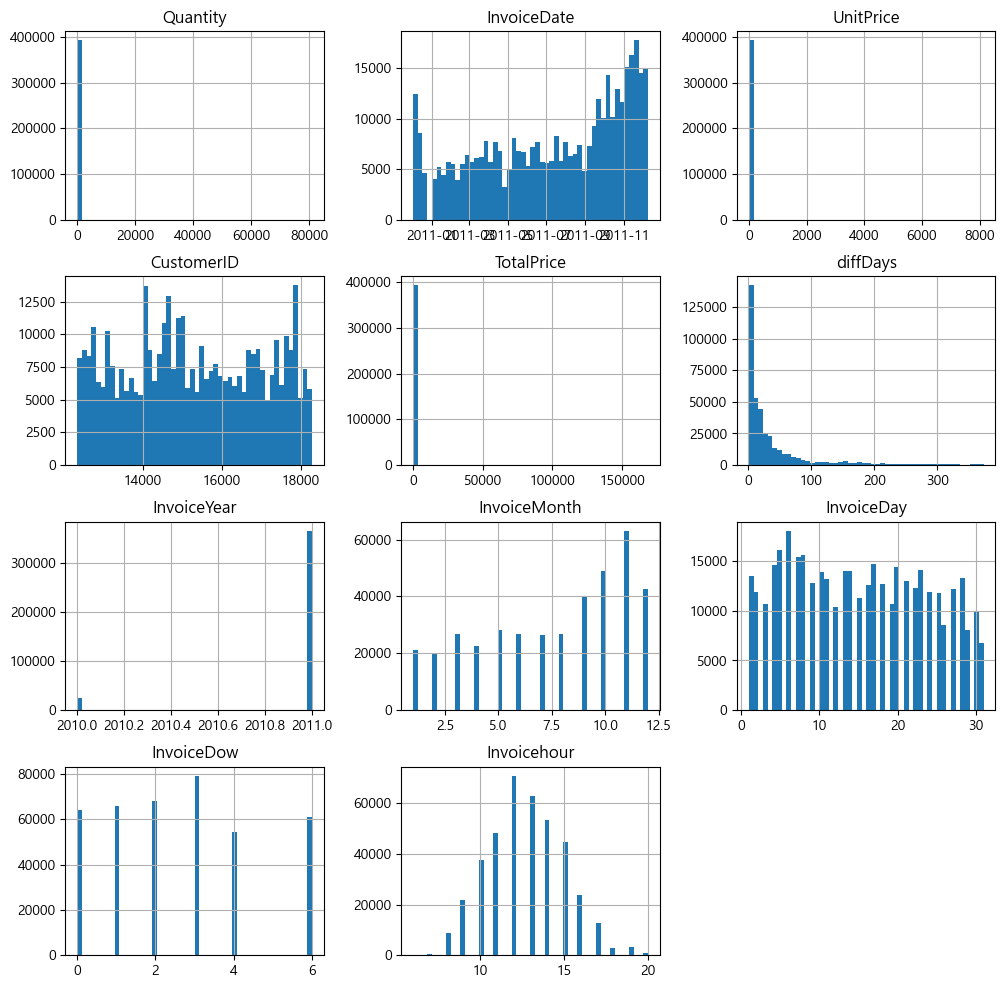

In [48]:
# hist로 전체 수치 변수의 히스토그램을 시각화 
df_valid.hist(figsize=(12,12), bins=50)
# Quantity 랑 Unitprice 는 뾰족한 게 많아서, 이상치가 뒤에 있음
# 연속형 수치 및 범주형 수치 

<Axes: xlabel='InvoiceYear', ylabel='count'>

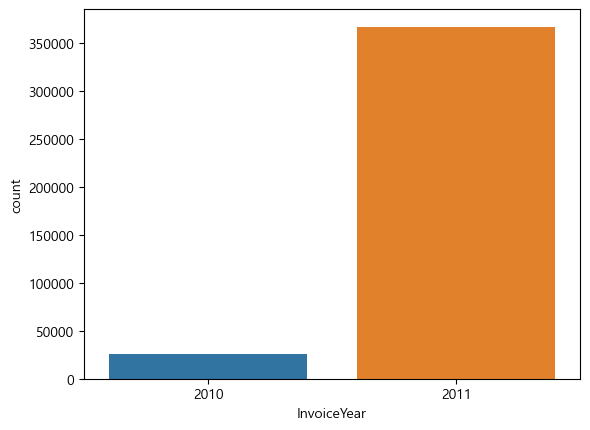

In [49]:
sns.countplot(data=df_valid, x = 'InvoiceYear')

<Axes: xlabel='InvoiceMonth', ylabel='count'>

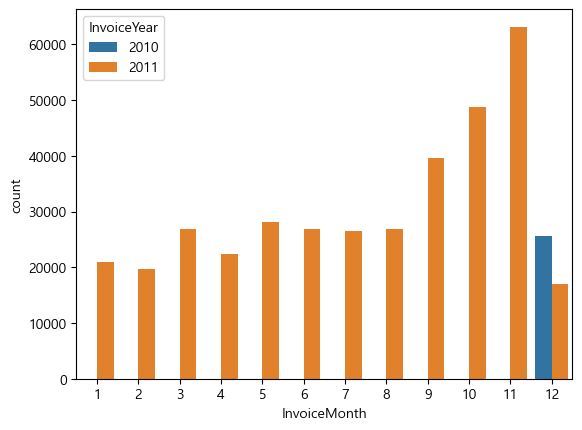

In [50]:
sns.countplot(data=df_valid, x='InvoiceMonth', hue='InvoiceYear')

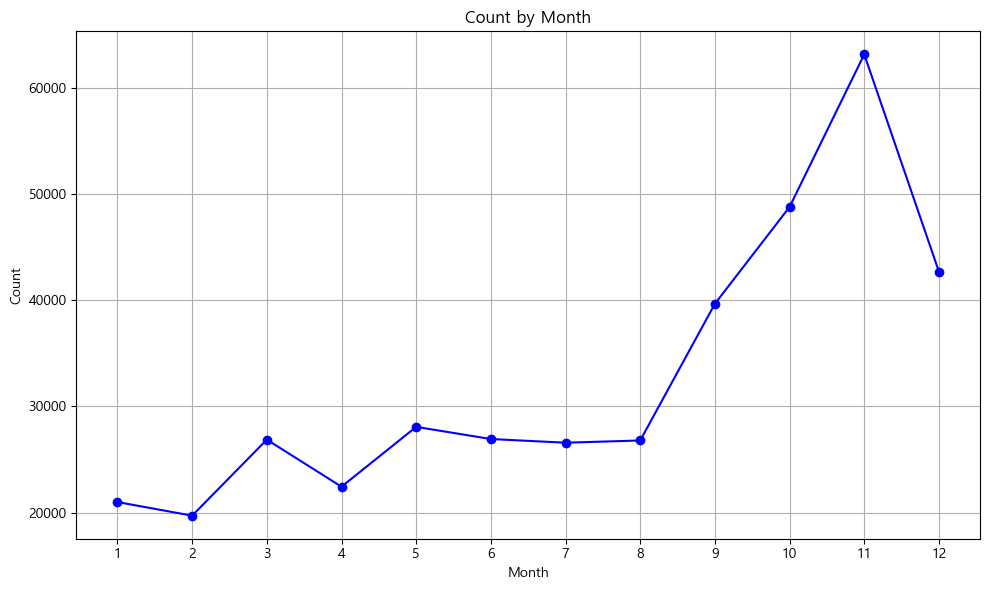

In [51]:
# 4계절 중에 가장 많이 팔린 시기 

# 먼저 전체적으로 
test = df_valid['InvoiceMonth'].value_counts().sort_index()

# 꺾은 선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, marker='o', linestyle='-', color='b')
plt.title('Count by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(test.index)  # x축에 모든 인덱스 레이블 표시
plt.tight_layout()

# 그래프 출력
plt.show()

- 가을 겨울 시즌에 많이 팔리네 

### 요일별 빈도수 

<Axes: xlabel='InvoiceDow', ylabel='count'>

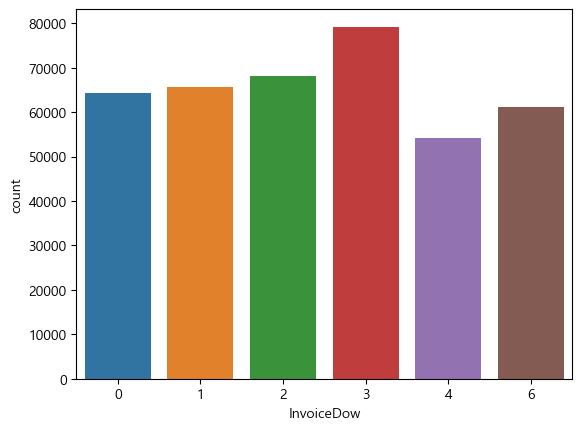

In [363]:
sns.countplot(data=df_valid, x='InvoiceDow')

In [364]:
day_name = [w for w in '월화수목금토일']
day_name

['월', '화', '수', '목', '금', '토', '일']

In [365]:
day_name.remove('토')
day_name

['월', '화', '수', '목', '금', '일']

In [366]:
dow_count = df_valid['InvoiceDow'].value_counts().sort_index()
dow_count.index = day_name

In [367]:
dow_count

월    64231
화    65744
수    68040
목    79243
금    54222
일    61212
Name: count, dtype: int64

<Axes: >

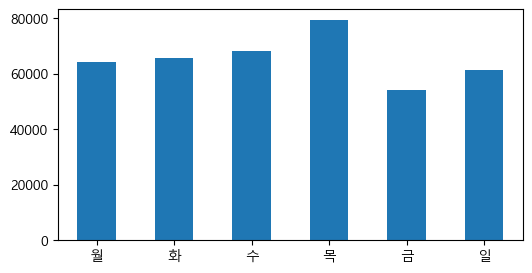

In [368]:
dow_count.plot.bar(figsize=(6,3), rot=0)

In [369]:
df_valid['InvoiceDow']

0         2
1         2
2         2
3         2
4         2
         ..
392687    4
392688    4
392689    4
392690    4
392691    4
Name: InvoiceDow, Length: 392692, dtype: int32

In [370]:
test = df_valid['InvoiceDow'].value_counts().sort_index()
test

InvoiceDow
0    64231
1    65744
2    68040
3    79243
4    54222
6    61212
Name: count, dtype: int64

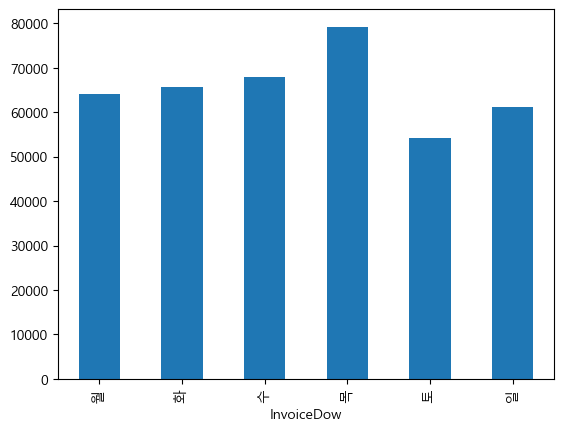

In [371]:
ax = test.plot(kind='bar', color='#1f77b4')
ax.set_xticklabels(['월', '화', '수', '목', '토', '일']);

<Axes: xlabel='Invoicehour', ylabel='count'>

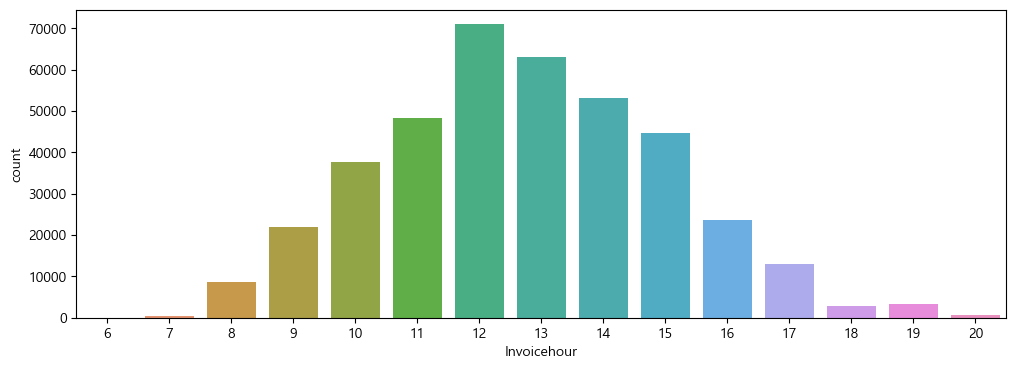

In [372]:
# countplot으로 시간대 (InvoiceHour) 구매 빈도수 시각화 
plt.figure(figsize=(12,4))
sns.countplot(data=df_valid, x='Invoicehour')

Text(0.5, 1.0, '시간대별 주문량')

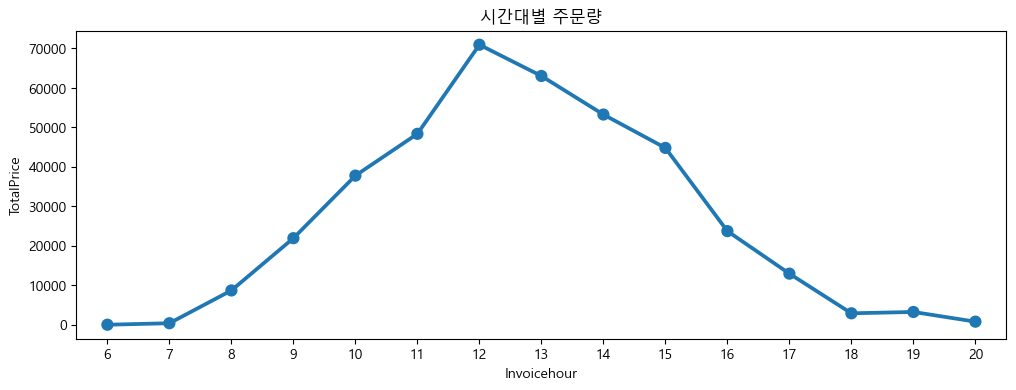

In [373]:
plt.figure(figsize=(12,4))
sns.pointplot(data=df_valid, x='Invoicehour', y='TotalPrice', estimator=len, errorbar=None).set_title('시간대별 주문량')
# len은 데이터 갯수 

Text(0.5, 1.0, '시간대별 매출액')

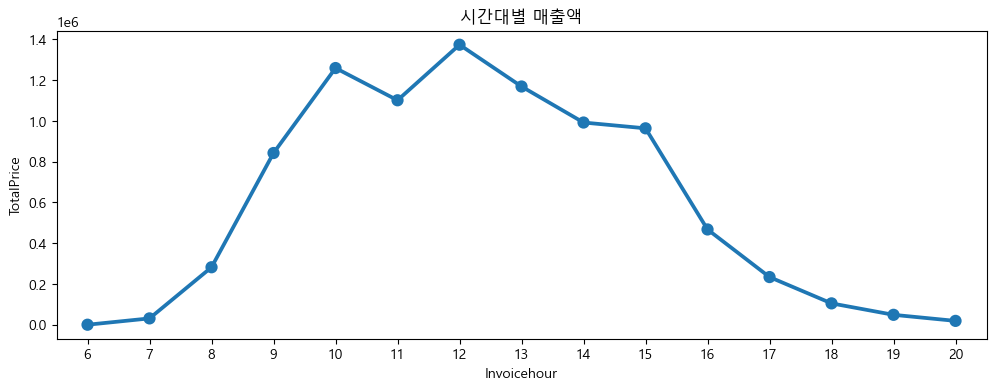

In [374]:
plt.figure(figsize=(12,4))
sns.pointplot(data=df_valid, x='Invoicehour', y='TotalPrice', estimator='sum', errorbar=None).set_title('시간대별 매출액')

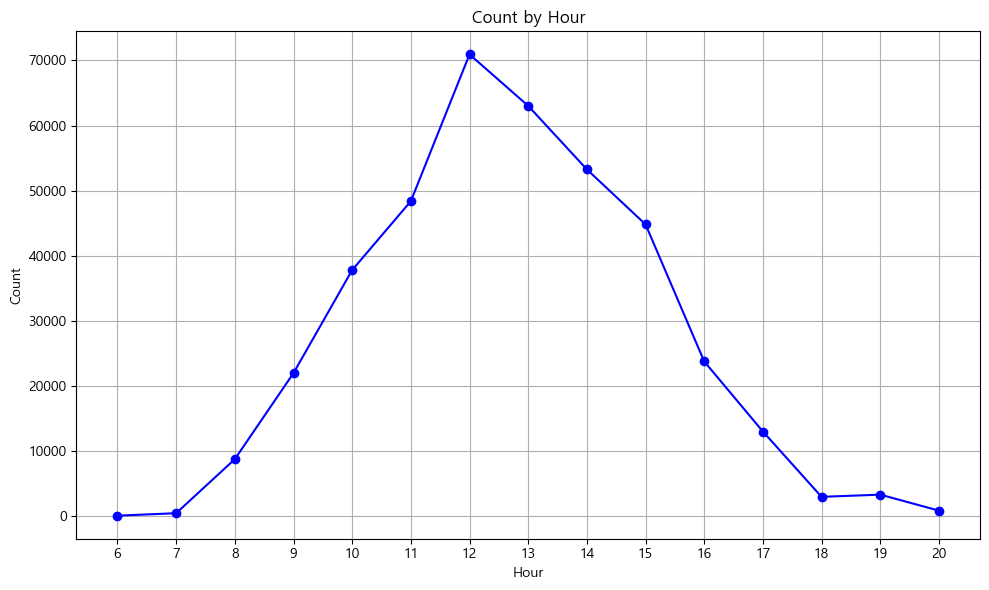

In [375]:
# 몇 시에 구매가 많은지 확인하고 싶음 

# 먼저 전체적으로 
test = df_valid['Invoicehour'].value_counts().sort_index()

# 꺾은 선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, marker='o', linestyle='-', color='b')
plt.title('Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(test.index)  # x축에 모든 인덱스 레이블 표시
plt.tight_layout()

# 그래프 출력
plt.show()

- 정오 낮 시간대에 가장 많은 구매 활동이 일어남.
- 쿠폰 발행, 문자 발송 시간대를 확인  

In [382]:
# 요일 정보를 문자열로 매핑
day_map = {
    0: '월',
    1: '화',
    2: '수',
    3: '목',
    4: '금',
    5: '토',
    6: '일'
}

# 요일 컬럼 추가
df_valid['Weekday'] = df_valid['InvoiceDow'].map(day_map)
df_valid.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,diffDays,...,InvoiceTime,Invoicehour,InvoiceDateFirst,CohortIndex,InvoiceDateFirstYM,Recency,Frequency,MonetaryValue,Length,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,302.0,...,08:26:00,8,2010-12-01 08:26:00,1,2010-12,372,297,5391.21,1,수
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,...,08:26:00,8,2010-12-01 08:26:00,1,2010-12,372,297,5391.21,1,수


#### 시간 - 요일별 빈도수 분석

In [383]:
# 시간 - 요일별 빈도수를 분석해서 최적의 노출 time 을 구하기 
# 광고에 도움을 줄 수 있음 . 광고 세그먼트를 정해서 전략적으로 광고를 트는 것이 중요 (광고 예산 효과적 사용)
hour_dow = pd.crosstab(df_valid['Invoicehour'], df_valid['Weekday'])
hour_dow = hour_dow[['월','화','수','목','금','일']]
hour_dow

Weekday,월,화,수,목,금,일
Invoicehour,,,,,,
6,0,0,0,1,0,0
7,61,65,59,64,130,0
8,1563,1710,1818,1763,1833,0
9,4345,4542,4078,4569,4368,25
10,6106,6575,6927,7528,7161,3476
11,7401,8418,8292,7134,7189,9931
12,10585,11903,12684,12908,9765,13093
13,10459,10274,11137,11446,8300,11403
14,9119,9428,8716,9173,7227,9588


In [384]:
hour_dow.style.background_gradient(axis=None)

Weekday,월,화,수,목,금,일
Invoicehour,,,,,,
6,0,0,0,1,0,0
7,61,65,59,64,130,0
8,1563,1710,1818,1763,1833,0
9,4345,4542,4078,4569,4368,25
10,6106,6575,6927,7528,7161,3476
11,7401,8418,8292,7134,7189,9931
12,10585,11903,12684,12908,9765,13093
13,10459,10274,11137,11446,8300,11403
14,9119,9428,8716,9173,7227,9588


## 품목 분석
- 가장 많이 팔린 상품 / 안팔린 상품
- 어떤 상품이 매출에 영향을 주는지  

In [385]:
# 연월을 기준으로 price 합계 살펴보기 
df_valid.groupby('InvoiceYM')['TotalPrice'].sum()

InvoiceYM
2010-12     570422.730
2011-01     568101.310
2011-02     446084.920
2011-03     594081.760
2011-04     468374.331
2011-05     677355.150
2011-06     660046.050
2011-07     598962.901
2011-08     644051.040
2011-09     950690.202
2011-10    1035642.450
2011-11    1156205.610
2011-12     517190.440
Name: TotalPrice, dtype: float64

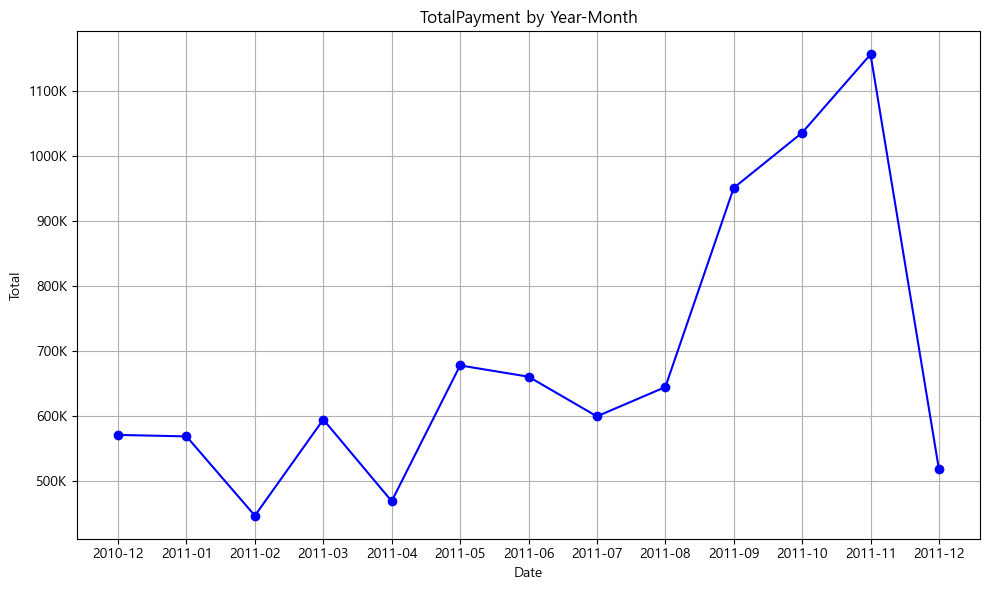

In [386]:
from matplotlib.ticker import FuncFormatter

# 먼저 전체적으로 
test = df_valid.groupby('InvoiceYM')['TotalPrice'].sum().sort_index()

# 꺾은 선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, marker='o', linestyle='-', color='b')
plt.title('TotalPayment by Year-Month')
plt.xlabel('Date')
plt.ylabel('Total')
plt.grid(True)
plt.xticks(test.index)  # x축에 모든 인덱스 레이블 표시

# Y축 레이블 포맷팅 함수
def format_func(value, tick_number):
    return f'{value / 1000:.0f}K'  # 1000으로 나누고 'K' 추가

# Y축 포맷터 설정
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

plt.tight_layout()

# 그래프 출력
plt.show()

#### 상품별 매출 추이 시각화 

In [387]:
test = df_valid['StockCode'].value_counts().head(10)
test_index = list(test.index)
test_index

['85123A', 22423, '85099B', 84879, 47566, 20725, 22720, 'POST', 23203, 20727]

In [388]:
top10 = df_valid[df_valid['StockCode'].isin(test_index)]
top10

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,diffDays,...,InvoiceTime,Invoicehour,InvoiceDateFirst,CohortIndex,InvoiceDateFirstYM,Recency,Frequency,MonetaryValue,Length,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,302.0,...,08:26:00,8,2010-12-01 08:26:00,1,2010-12,372,297,5391.21,1,수
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,32.0,...,08:34:00,8,2010-12-01 08:34:00,1,2010-12,32,172,3237.54,342,수
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France,54.00,3.0,...,08:45:00,8,2010-12-01 08:45:00,1,2010-12,3,247,7281.38,370,수
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,15.30,302.0,...,09:02:00,9,2010-12-01 08:26:00,1,2010-12,372,297,5391.21,1,수
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,15.30,302.0,...,09:32:00,9,2010-12-01 08:26:00,1,2010-12,372,297,5391.21,1,수
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392513,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany,18.00,1.0,...,11:59:00,11,2010-12-01 13:04:00,13,2010-12,1,230,3849.78,372,금
392550,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany,36.00,1.0,...,12:09:00,12,2011-09-06 14:19:00,4,2011-09,1,71,1316.66,93,금
392551,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.0,Germany,54.00,1.0,...,12:16:00,12,2011-12-09 12:16:00,1,2011-12,1,38,848.55,0,금
392648,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom,58.00,1.0,...,12:23:00,12,2010-12-01 16:01:00,13,2010-12,1,197,25977.16,372,금


In [389]:
test_pivot = top10.pivot_table(index='InvoiceYM', columns='StockCode', values='TotalPrice', aggfunc='sum')
test_pivot

StockCode,20725,20727,22423,22720,23203,47566,84879,85099B,85123A,POST
InvoiceYM,,,,,,,,,,
2010-12,1055.55,731.70,17581.50,1011.60,NaN,793.50,3652.59,3619.20,9602.05,4430.00
2011-01,2370.90,1068.80,10765.50,4899.30,NaN,1815.15,2704.19,4542.75,14962.05,5109.00
2011-02,1675.40,682.90,9559.65,3068.85,NaN,3476.90,2620.91,5191.05,4912.65,3166.00
2011-03,2174.55,1608.90,14784.65,3614.70,NaN,6129.15,3997.98,8496.88,5262.50,5325.00
2011-04,1504.60,730.95,12721.50,237.60,NaN,7278.45,3886.72,4141.78,9581.65,3409.95
2011-05,3439.05,1572.05,11503.60,4.95,4569.20,13408.25,4977.24,6585.20,10700.42,13358.75
2011-06,2332.10,1655.80,8216.35,3667.45,3828.14,8266.15,2523.64,6628.42,4401.90,5510.02
2011-07,2631.95,2094.55,12174.00,2336.80,4219.20,10311.15,2979.47,5654.60,8295.12,5311.34
2011-08,3141.45,2150.60,8921.70,2782.41,7670.12,6306.05,9652.41,9697.44,5498.10,5185.95


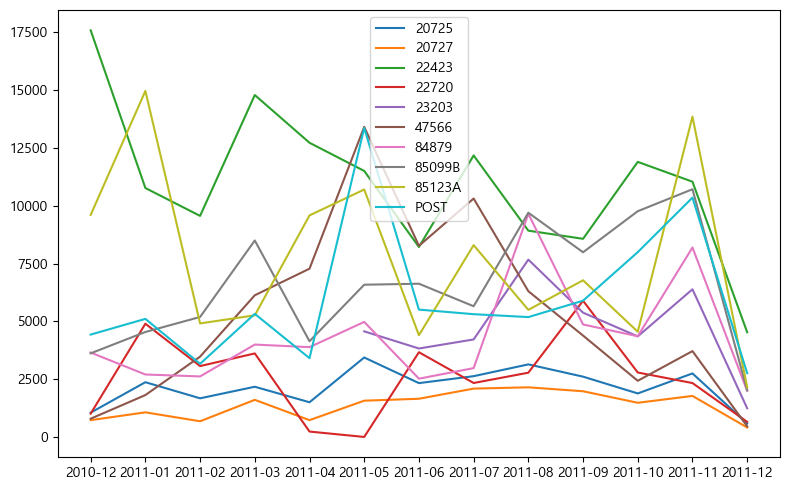

In [390]:
#자동화 
plt.figure(figsize=(8,5))
sy = list(test_pivot.columns)
for ind, value in enumerate(sy):
    plt.plot(list(test_pivot.index), test_pivot[value], label=value)
plt.legend()
plt.tight_layout()

- 이렇게 전체 월별에 대한 top10 품목의 매출액을 확인하면 다 비슷함
- 차라리 매출이 가장 많이 늘은 9~11월의 품목 매출액 top10을 살펴보자 

In [391]:
test = df_valid[df_valid['InvoiceYM'].isin(['2011-09','2011-10','2011-11'])]
test.groupby('InvoiceYM')['StockCode'].value_counts()

InvoiceYM  StockCode
2011-09    23355        192
           85099B       185
           23203        174
           85123A       157
           22086        145
                       ... 
2011-11    23125          1
           22950          1
           22936          1
           22933          1
           22968          1
Name: count, Length: 7862, dtype: int64

In [392]:
test10 = test[test['InvoiceYM'] == '2011-09']['StockCode'].value_counts().head(10)
test10 = list(test10.index)
test10

[23355, '85099B', 23203, '85123A', 22086, 23209, 22423, 20725, 84879, 23298]

In [393]:
test11 = test[test['InvoiceYM'] == '2011-10']['StockCode'].value_counts().head(10)
test11 = list(test11.index)
test11

[22086, 23355, '85099B', 22423, 23284, '85123A', 84879, 22910, 22865, 23344]

In [394]:
test12 = test[test['InvoiceYM'] == '2011-11']['StockCode'].value_counts().head(10)
test12 = list(test12.index)
test12

[23084, 22086, 23355, 22910, '85123A', 23344, 22578, 23583, 23581, '85099B']

In [395]:
# 모든 리스트를 하나로 병합
combined_list = test10 + test11 + test12

unique_combined_list = list(set(combined_list))
unique_combined_list, len(unique_combined_list)

(['85099B',
  23203,
  23298,
  22086,
  23209,
  23084,
  84879,
  23344,
  22865,
  22578,
  '85123A',
  20725,
  23284,
  22423,
  23355,
  23581,
  22910,
  23583],
 18)

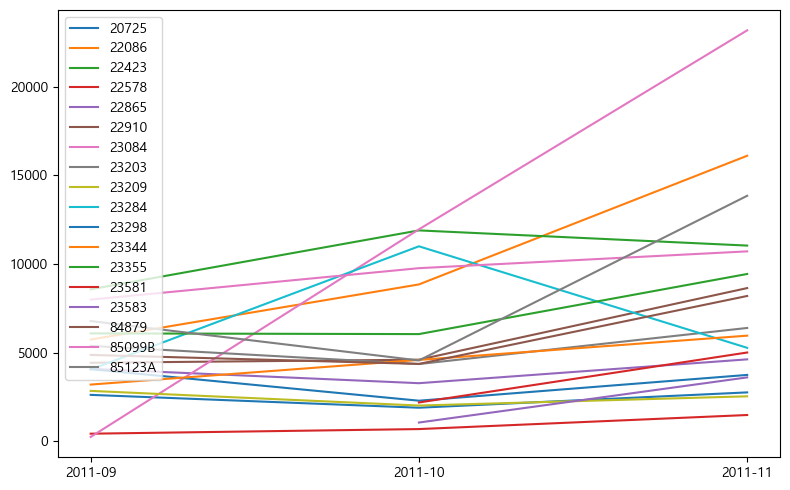

In [396]:
# 3개월 top10 아이템의 매출액 추이 확인 
top = df_valid.loc[(df_valid['StockCode'].isin(unique_combined_list)) & df_valid['InvoiceYM'].isin(['2011-09','2011-10','2011-11'])]

test_pivot = top.pivot_table(index='InvoiceYM', columns='StockCode', values='TotalPrice', aggfunc='sum')

plt.figure(figsize=(8,5))
sy = list(test_pivot.columns)
for ind, value in enumerate(sy):
    plt.plot(list(test_pivot.index), test_pivot[value], label=value)
plt.legend()
plt.tight_layout()

In [397]:
df_valid[df_valid['StockCode'] == '85099B']['Description'].unique()

array(['JUMBO BAG RED RETROSPOT'], dtype=object)

- 이 품목이 9~11월까지 꾸준하게 판매량이 늘고 있음.
- 찾아보니깐 포장 백임. 매출을 꾸준히 견인하는 품목으로 사료됨 
- 연말 선물하려고 그런가..?

---

## 고객
* ARPU(Average Revenue Per User) : 
    * 가입한 서비스에 대해 가입자 1명이 특정 기간 동안 지출한 평균 금액
    * ARPU = 매출 / 중복을 제외한 순수 활동 사용자 수
* ARPPU(Average Revenue Per Paying User):
    * 지불 유저 1명 당 한 달에 결제하는 평균 금액을 산정한 수치
    

* [ARPU - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/ARPU)
* [ARPPU](https://terms.naver.com/entry.naver?docId=2028542&cid=42914&categoryId=42915)

In [398]:
# ARPPU
# 연도-월 별로 ARPPU 구하기
# 이 때 사용되는 고객 수 기준은 unique 한 값을 사용해야함 

arppu = df_valid.groupby('InvoiceYM').agg({'TotalPrice':'sum', 'CustomerID' : 'nunique'})
arppu['ARPPU'] = arppu['TotalPrice'] / arppu['CustomerID']
arppu
# arppu 가 시간에 따라 늘었는지, 줄어들었는지 볼 수 있다 

,TotalPrice,CustomerID,ARPPU
InvoiceYM,,,
2010-12,570422.730,885,644.545458
2011-01,568101.310,741,766.668435
2011-02,446084.920,758,588.502533
2011-03,594081.760,974,609.940205
2011-04,468374.331,856,547.166275
2011-05,677355.150,1056,641.434801
2011-06,660046.050,991,666.040414
2011-07,598962.901,949,631.151634
2011-08,644051.040,935,688.824642


In [404]:
arppu.style.background_gradient(axis=0)

,TotalPrice,CustomerID,ARPPU
InvoiceYM,,,
2010-12,570422.730000,885,644.545458
2011-01,568101.310000,741,766.668435
2011-02,446084.920000,758,588.502533
2011-03,594081.760000,974,609.940205
2011-04,468374.331000,856,547.166275
2011-05,677355.150000,1056,641.434801
2011-06,660046.050000,991,666.040414
2011-07,598962.901000,949,631.151634
2011-08,644051.040000,935,688.824642


<Axes: title={'center': 'TotalPrice'}, xlabel='InvoiceYM'>

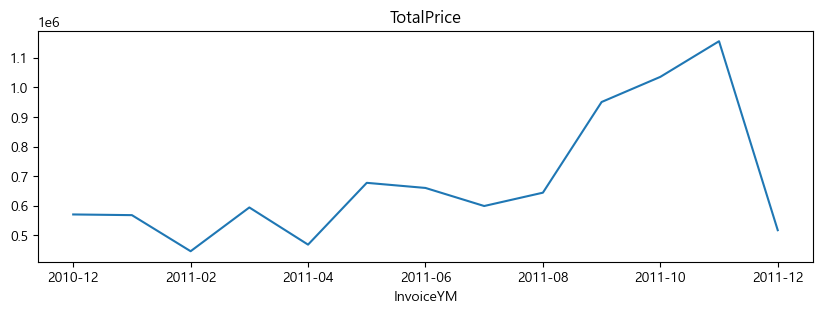

In [399]:
arppu['TotalPrice'].plot(figsize=(10,3), title='TotalPrice')

<Axes: title={'center': '월별 고객 수'}, xlabel='InvoiceYM'>

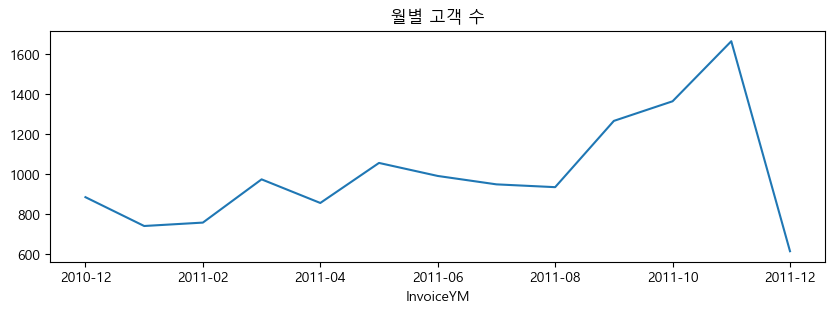

In [400]:
arppu['CustomerID'].plot(figsize=(10,3), title='월별 고객 수')

<Axes: title={'center': 'ARPPU'}, xlabel='InvoiceYM'>

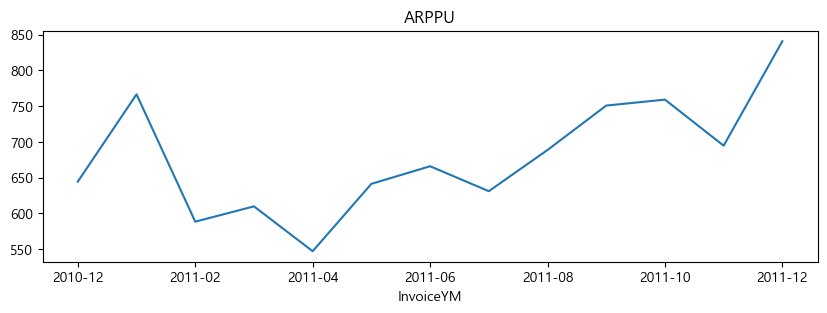

In [401]:
arppu['ARPPU'].plot(figsize=(10,3), title='ARPPU')

In [405]:
# df_valid(유효고객, 유효주문) 내 고객별 구매 빈도수를 구할 수 있음 
# 고객별 구매 빈도수, 평균 구매금액, 총 구매금액 
cust_agg = df_valid.groupby('CustomerID').agg({'InvoiceNo':'count', 'TotalPrice':['mean','sum']})
cust_agg.sort_values(('InvoiceNo','count'), ascending=False)

InvoiceNo    TotalPrice           
               count          mean        sum
CustomerID                                   
17841.0         7676      5.278770   40519.84
14911.0         5670     25.345885  143711.17
14096.0         5111     12.749910   65164.79
12748.0         4412      7.491657   33053.19
14606.0         2677      4.511076   12076.15
...              ...           ...        ...
13703.0            1     99.500000      99.50
13747.0            1     79.600000      79.60
17347.0            1    228.960000     228.96
17331.0            1    175.200000     175.20
12346.0            1  77183.600000   77183.60

[4338 rows x 3 columns]

In [406]:
df_valid.groupby('CustomerID').agg({'TotalPrice' : ['count','mean'], 'InvoiceNo':'count'})

TotalPrice               InvoiceNo
                count          mean     count
CustomerID                                   
12346.0             1  77183.600000         1
12347.0           182     23.681319       182
12348.0            31     57.975484        31
12349.0            73     24.076027        73
12350.0            17     19.670588        17
...               ...           ...       ...
18280.0            10     18.060000        10
18281.0             7     11.545714         7
18282.0            12     14.837500        12
18283.0           721      2.837074       721
18287.0            70     26.246857        70

[4338 rows x 3 columns]

In [407]:
cust_agg.describe()

InvoiceNo    TotalPrice               
             count          mean            sum
count  4338.000000   4338.000000    4338.000000
mean     90.523744     68.381590    2048.688081
std     225.506968   1467.918294    8985.230220
min       1.000000      2.136970       3.750000
25%      17.000000     12.393196     306.482500
50%      41.000000     17.755000     668.570000
75%      98.000000     24.878950    1660.597500
max    7676.000000  77183.600000  280206.020000

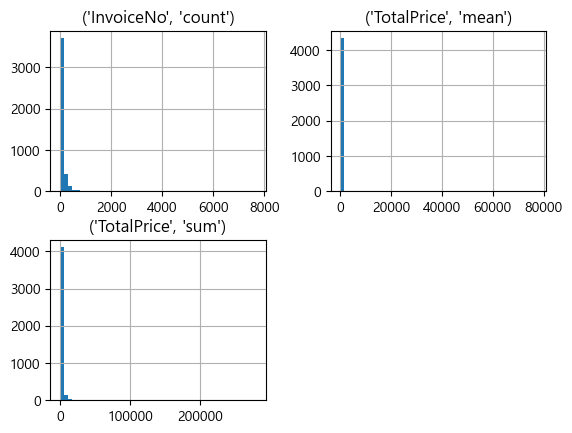

In [408]:
cust_agg.hist(bins=50);
# InvoiceNo 및 TotalPrice에 이상치가 많음 

## MAU (Monthly Active User)

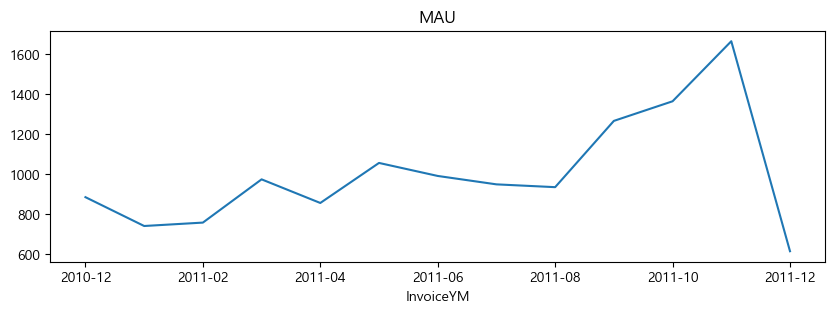

In [409]:
MAU = df_valid.groupby('InvoiceYM')['CustomerID'].nunique()
MAU.plot(figsize=(10,3), title='MAU');

# MAU 가 점점 늘어나는 추세이긴 함 

#### 월별 주문건, 중복을 제외한 주문제품 종류 수, 고객 수, 총 주문금액 

In [412]:
mau = df_valid.groupby('InvoiceYM').agg({'InvoiceNo':'count',
                                   'StockCode':'nunique',
                                   'CustomerID' : 'nunique',
                                   'UnitPrice' : 'mean',
                                   'Quantity' : 'sum',
                                   'TotalPrice' : 'sum'})

mau
# 월별로 주문되는 건수 
# 월별로 판매되는 제품 종류 (stockcode)
# 월별 MAU

,InvoiceNo,StockCode,CustomerID,UnitPrice,Quantity,TotalPrice
InvoiceYM,,,,,,
2010-12,25670,2411,885,3.142953,311048,570422.730
2011-01,20988,2121,741,3.155834,348473,568101.310
2011-02,19706,2124,758,3.177686,265027,446084.920
2011-03,26870,2234,974,3.269996,347582,594081.760
2011-04,22433,2217,856,3.501247,291366,468374.331
2011-05,28073,2219,1056,3.615606,372864,677355.150
2011-06,26926,2339,991,3.142043,363014,660046.050
2011-07,26580,2351,949,2.838771,367360,598962.901
2011-08,26790,2356,935,2.944274,397373,644051.040


In [413]:
mau.style.background_gradient(axis=0)

,InvoiceNo,StockCode,CustomerID,UnitPrice,Quantity,TotalPrice
InvoiceYM,,,,,,
2010-12,25670,2411,885,3.142953,311048,570422.730000
2011-01,20988,2121,741,3.155834,348473,568101.310000
2011-02,19706,2124,758,3.177686,265027,446084.920000
2011-03,26870,2234,974,3.269996,347582,594081.760000
2011-04,22433,2217,856,3.501247,291366,468374.331000
2011-05,28073,2219,1056,3.615606,372864,677355.150000
2011-06,26926,2339,991,3.142043,363014,660046.050000
2011-07,26580,2351,949,2.838771,367360,598962.901000
2011-08,26790,2356,935,2.944274,397373,644051.040000


---

## 리텐션 & 코호트
- 어제 왔던 유저가 오늘 또 왔는지 등 고객 유지에 대해서 면밀히 볼 수 있는 지표 

In [414]:
# 우리 데이터셋은 1년 단위임 
# 월단위로 코호트 묶어서 리텐션을 구해보자 

In [415]:
df_valid['InvoiceDateFirst'] = df_valid.groupby(['CustomerID'])['InvoiceDate'].transform('min')
# transform 메소드를 사용하면 원래의 데이터셋 크기와 인덱스에 매칭되게 함수가 적용되어서 값이 출력
# 고객별로 최초로 구매한 날짜 

In [416]:
df_valid[['CustomerID', 'InvoiceDate', 'InvoiceDateFirst']].sample(5)

,CustomerID,InvoiceDate,InvoiceDateFirst
291003,14179.0,2011-10-18 14:00:00,2011-10-18 14:00:00
332407,14713.0,2011-11-10 17:13:00,2010-12-09 18:58:00
237850,15311.0,2011-09-13 11:51:00,2010-12-01 09:41:00
40860,14130.0,2011-01-24 16:05:00,2011-01-24 16:05:00
317358,13914.0,2011-11-03 16:28:00,2011-11-03 16:28:00


### 첫 구매일로부터 몇 달 째 구매인가?

In [417]:
# 연도별, 월별 차이를 구합니다 

# year_diff
year_diff = df_valid['InvoiceDate'].dt.year - df_valid['InvoiceDateFirst'].dt.year

month_diff = df_valid['InvoiceDate'].dt.month - df_valid['InvoiceDateFirst'].dt.month
month_diff.value_counts()
# 마이너스가 있는 행이 있음. 연도 차이 때문에 

 0     124030
-1      21677
 2      18038
 1      17405
 3      15872
 4      15537
 5      14727
-3      14098
-2      13399
 6      12393
 7      11986
-7      11946
 8      11435
-4      11316
-5      11312
-9      11121
-6      11069
-11     10111
-8       9628
 9       8870
-10      8689
 10      6699
 11      1334
Name: count, dtype: int64

In [418]:
year_diff.value_counts()

0    251153
1    141539
Name: count, dtype: int64

In [419]:
# 따라서, 첫 구매 후 몇달 후 구매인지 알 수 있도록 CohortIndex 변수 생성
# 2010-12-01 ~ 2011-12-01의 데이터를 기반으로 진행되어 최솟값은 1이며, 최댓값은 13이다 
df_valid['CohortIndex'] = (year_diff * 12) + month_diff + 1

In [420]:
df_valid['CohortIndex'].value_counts()

CohortIndex
1     116857
2      27516
4      26993
3      26727
6      26673
5      25165
7      23462
8      23298
12     23011
10     22968
9      22751
11     20098
13      7173
Name: count, dtype: int64

### 코호트별 월별 빈도수 
-  코호트 분석은 특정 시점에 가입한 고객들이 이후 시점에서 어떻게 행동하는지를 분석하는 방법입니다. 주어진 데이터는 특정 시점(코호트)의 고객 수를 나타내는 것으로 추정됩니다.

In [421]:
df_valid['CohortIndex'].value_counts()

CohortIndex
1     116857
2      27516
4      26993
3      26727
6      26673
5      25165
7      23462
8      23298
12     23011
10     22968
9      22751
11     20098
13      7173
Name: count, dtype: int64

<Axes: xlabel='CohortIndex', ylabel='count'>

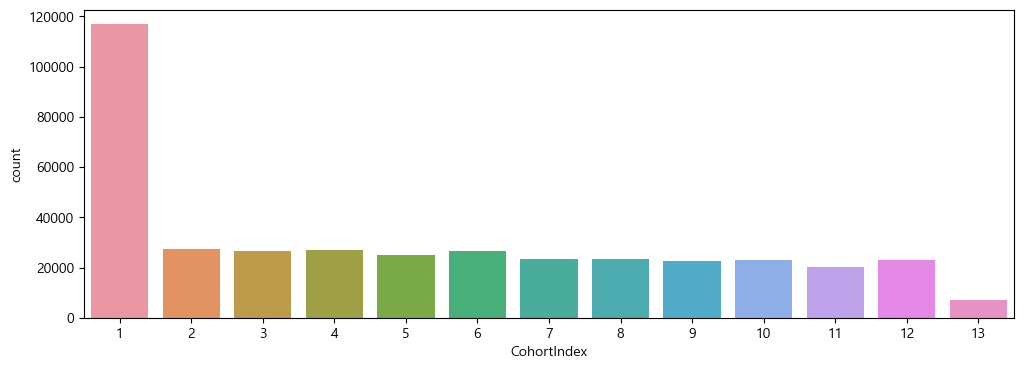

In [422]:
plt.figure(figsize=(12,4))
sns.countplot(data=df_valid, x='CohortIndex')
# 1번째 달에 구매한 사람은 많은데 그다음달부터 급격히 감소 
# 고객 유지가 잘 안됨 -> 그 다음 달에 더 많게 구매하도록 뭔가 트리거가 필요 ? 
# 아까 시간별 세그멘테이션으로 광고 마케팅 전략? 

### 잔존 빈도 구하기

In [423]:
df_valid['InvoiceDateFirst'].astype(str).str[:7]

0         2010-12
1         2010-12
2         2010-12
3         2010-12
4         2010-12
           ...   
392687    2011-08
392688    2011-08
392689    2011-08
392690    2011-08
392691    2011-08
Name: InvoiceDateFirst, Length: 392692, dtype: object

In [424]:
df_valid['InvoiceDateFirstYM'] = df_valid['InvoiceDateFirst'].astype(str).str[:7]

In [425]:
# 처음에 구매한 연월 및 코호트 인덱스 에 따라 고객 수 구하기 
# 코호트 기간에 따라 잔존된, 살아남은 고객 수는 얼마나 되는지
df_valid.groupby(['InvoiceDateFirstYM', 'CohortIndex'])['CustomerID'].nunique().head(20)

InvoiceDateFirstYM  CohortIndex
2010-12             1              885
                    2              324
                    3              286
                    4              340
                    5              321
                    6              352
                    7              321
                    8              309
                    9              313
                    10             350
                    11             331
                    12             445
                    13             235
2011-01             1              417
                    2               92
                    3              111
                    4               96
                    5              134
                    6              120
                    7              103
Name: CustomerID, dtype: int64

In [426]:
cohort_count = df_valid.groupby(['InvoiceDateFirstYM', 'CohortIndex'])['CustomerID'].nunique().unstack()
cohort_count
# 마지막 인덱스 값을 컬럼으로 올려둠
# 2010-12월에 온사람은 13개월 뒤에 235명 남음
# 처음 신규 유치한 고객의 수는 코호트 인덱스 1열을 보면 된다. 

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateFirstYM,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='InvoiceDateFirstYM'>

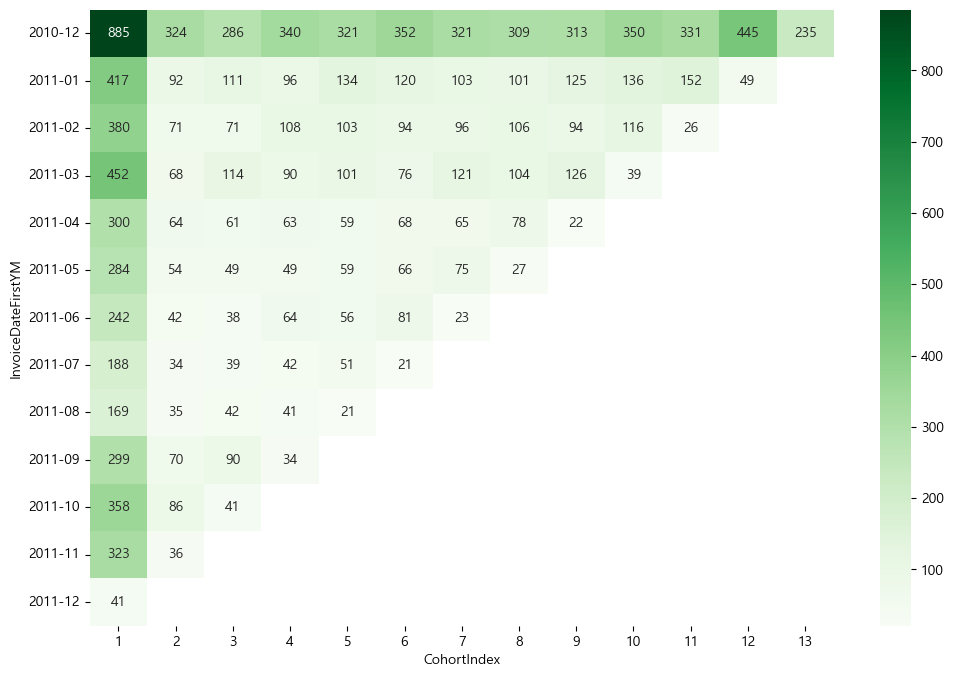

In [427]:
plt.figure(figsize=(12,8))
sns.heatmap(cohort_count, cmap='Greens', annot=True, fmt='.0f')

In [81]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

## 월별 신규 유입 고객수 
- Acquisition

In [428]:
cohort_count[1]

InvoiceDateFirstYM
2010-12    885.0
2011-01    417.0
2011-02    380.0
2011-03    452.0
2011-04    300.0
2011-05    284.0
2011-06    242.0
2011-07    188.0
2011-08    169.0
2011-09    299.0
2011-10    358.0
2011-11    323.0
2011-12     41.0
Name: 1, dtype: float64

<Axes: title={'center': 'Monthly Acqusition'}, xlabel='InvoiceDateFirstYM'>

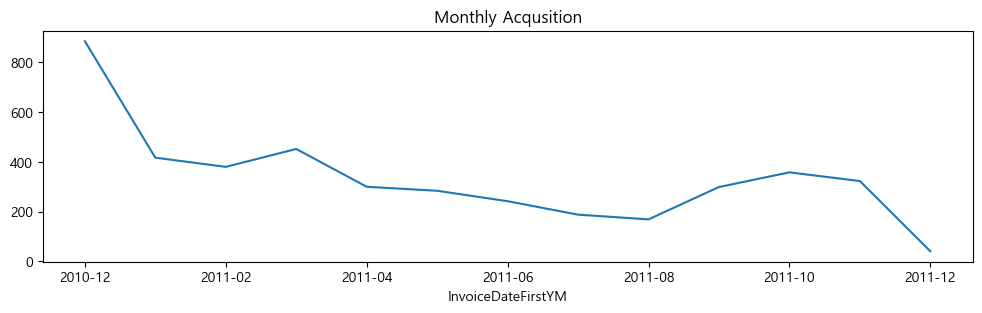

In [431]:
cohort_count[1].plot(figsize=(12,3), rot=0, title='Monthly Acqusition')

<Axes: title={'center': 'Monthly Acqusition'}, xlabel='InvoiceDateFirstYM'>

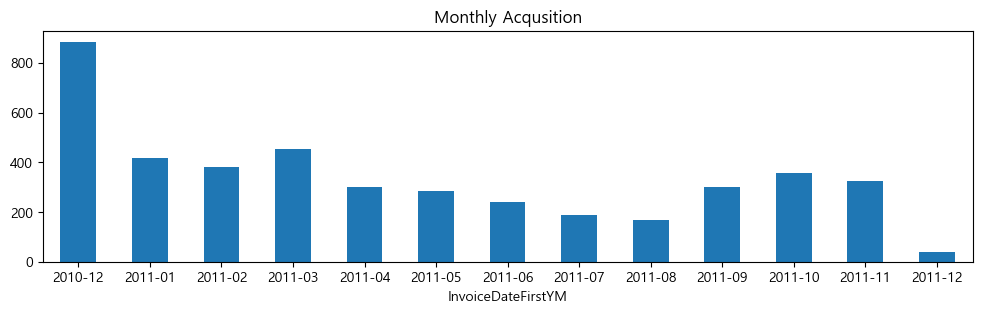

In [432]:
cohort_count[1].plot(kind='bar', figsize=(12,3), rot=0, title='Monthly Acqusition')

- 월별 말고 일자별, 주별도 구할 수 있음 

## 잔존율 구하기 

In [433]:
# 가입한 달을 1로 나누면 잔존률을 구할 수 있음 
cohort_norm = cohort_count.div(cohort_count[1], axis=0)
cohort_norm

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateFirstYM,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='InvoiceDateFirstYM'>

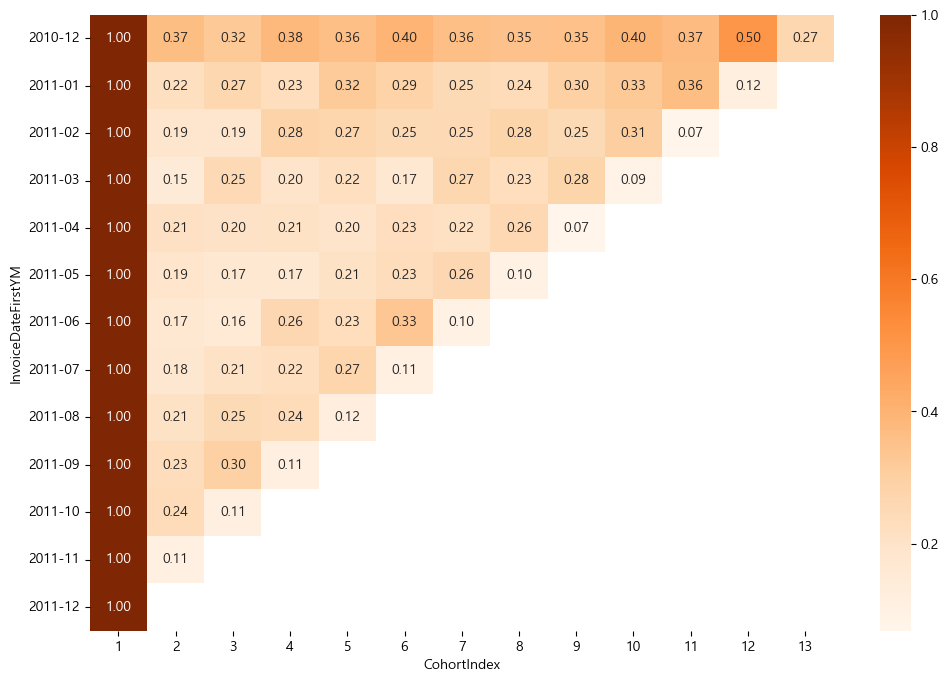

In [434]:
plt.figure(figsize=(12,8))
sns.heatmap(cohort_norm, cmap='Oranges', annot=True, fmt='.2f')

## 고객별 매출액 
- 위에서는 고객이 해당 서비스에 얼마나 남았는지 봤더면,
- 이제는 고객이 얼마나 매출을 이끄는지? 첫달에 온 고객이 그 다음에 매출을 얼마나 내주고 를 볼 수 있음

In [435]:
df_valid.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,diffDays,...,InvoiceTime,Invoicehour,InvoiceDateFirst,CohortIndex,InvoiceDateFirstYM,Recency,Frequency,MonetaryValue,Length,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,302.0,...,08:26:00,8,2010-12-01 08:26:00,1,2010-12,372,297,5391.21,1,수


In [436]:
#df_valid.to_csv('df_valid.csv')

In [437]:
df_valid.groupby(['InvoiceDateFirstYM', 'CohortIndex'])['TotalPrice'].sum().head(20)

InvoiceDateFirstYM  CohortIndex
2010-12             1              570422.73
                    2              275734.47
                    3              233390.47
                    4              302367.44
                    5              204034.38
                    6              336113.69
                    7              313668.16
                    8              310304.03
                    9              331001.07
                    10             471792.13
                    11             455478.90
                    12             512341.08
                    13             185360.97
2011-01             1              292366.84
                    2               54993.86
                    3               63157.01
                    4               71526.09
                    5               80989.77
                    6               84464.57
                    7               70073.35
Name: TotalPrice, dtype: float64

In [438]:
cohort_totalprice = df_valid.groupby(['InvoiceDateFirstYM', 'CohortIndex'])['TotalPrice'].sum().unstack()
cohort_totalprice

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateFirstYM,,,,,,,,,,,,,
2010-12,570422.730,275734.47,233390.47,302367.44,204034.38,336113.69,313668.16,310304.03,331001.070,471792.13,455478.90,512341.08,185360.97
2011-01,292366.840,54993.86,63157.01,71526.09,80989.77,84464.57,70073.35,72503.42,71870.481,111370.70,123252.86,26388.03,NaN
2011-02,157700.590,28937.64,40964.47,48155.39,40089.17,34155.67,49673.71,62292.80,55241.340,64688.86,10600.22,NaN,NaN
2011-03,199619.670,30040.34,58958.41,42739.08,51392.44,39962.33,64824.15,70523.62,70847.620,12761.10,NaN,NaN,NaN
2011-04,121809.051,29398.59,25028.57,24282.79,26253.16,30103.24,28505.90,34009.61,6332.000,NaN,NaN,NaN,NaN
2011-05,123739.300,18641.70,20155.73,19162.17,27752.62,32875.34,33168.34,179184.23,NaN,NaN,NaN,NaN,NaN
2011-06,135414.800,14738.49,14104.37,30898.56,26669.90,42531.09,8143.22,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,73860.401,11789.67,15488.37,17391.93,19156.82,6040.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,79601.140,20933.76,35458.48,44487.65,15284.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='InvoiceDateFirstYM'>

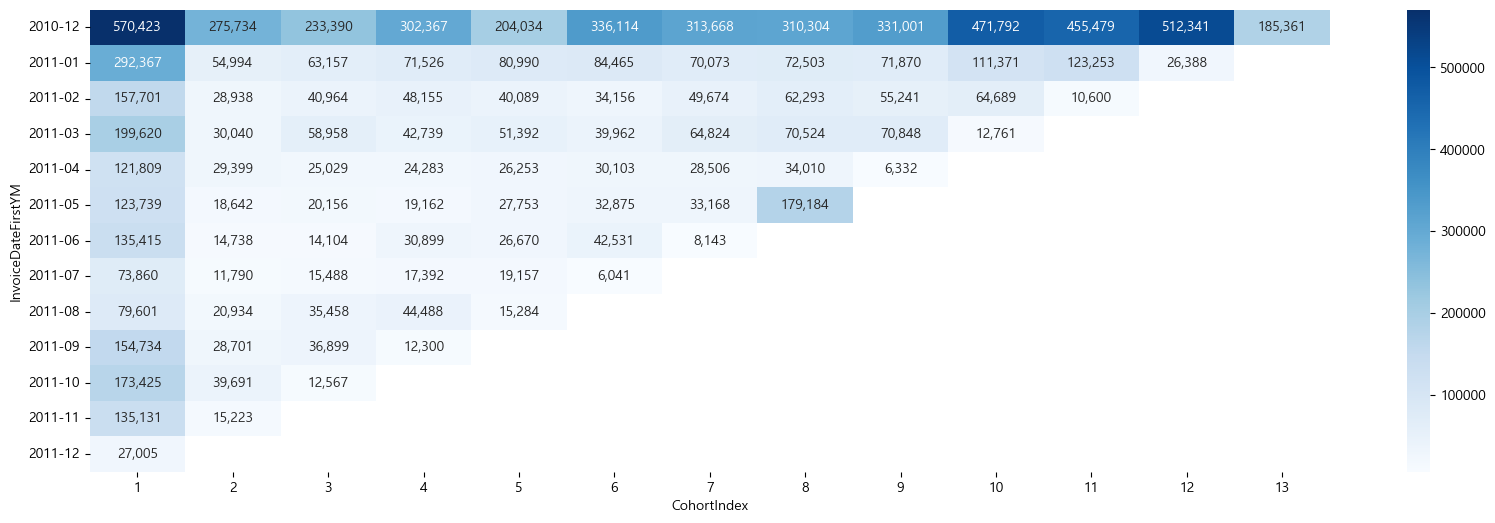

In [439]:
plt.figure(figsize=(20,6))
sns.heatmap(cohort_totalprice, cmap='Blues', annot=True, fmt=',.0f')

- 앞에서는 코호트에 따른 고객 수를 구했다면, 지금은 코호트 별로 고객 매출액을 구함
- 2010-12월에 온 고객들이 매출을 많이 내줌. 2010-12월에 고객 신규 획득수가 가장 높음 

## RFM
- 고객은 기업에 가장 큰 자산임. 기업의 첫번째 과업은 고객 창출임. 고객 상위 4%가 30% 매출을 냄.
- 콩나물 우유 물건만 사는 고객과 노트북 TV 사는 고객과 세그먼테이션을 나눠서 달리 봐야함
- 다중회귀분석을 통해 고객의 미래 구매 행동 예측 할 수 있음

## 고객 세분화 
- 상품과 서비스 판매 정보 : 상품판매 자료 거래 금액, 횟수
- 인구통계학 정보 : 나이, 성별, 직업, 학력, 거주지역, 소득수준
- 라이프 스타일 정보
- 심리 정보 : 구매 욕구
- 행동 정보 : 구매 패턴 LTV (Life Time Value)

In [440]:
raw = pd.read_excel('./Online Retail.xlsx')
raw.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [441]:
raw.shape

(541909, 8)

### 유효한 데이터만 추출
- 회원 고객만 필터링
- 주문 취소건은 제외 

In [442]:
raw.loc[raw['CustomerID'].notnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [443]:
test = raw.loc[ (raw['CustomerID'].notnull()) & (~(raw['InvoiceNo'].str.startswith('C', na=False)))]
test

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [444]:
test.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.000000,397924,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.420210,NaN,22.096788,1713.169877


In [445]:
# UnitPrice 가 0인 데이터도 제외 
raw_valid = test[test['UnitPrice'] != 0].copy()
raw_valid.shape

(397884, 8)

## 구매 금액 계산 

In [446]:
raw_valid['TotalPrice'] = raw_valid['Quantity'] * raw_valid['UnitPrice']
raw_valid.head()
# 파생변수 생성

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [447]:
raw_valid.describe()
# Quantity / UnitPrice / TotalPrice : 이상치가 존재함. 어떻게 처리할지 고민.. 

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,397884.000000,397884,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,179.331775,NaN,22.097877,1713.141560,309.071041


## 이상치 처리
- 이상치가 있는 고객과 아닌 고객을 나눠서 관리 할 수 도 있다 

In [448]:
raw_valid['TotalPrice']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalPrice, Length: 397884, dtype: float64

In [449]:
Q1 =raw_valid[['Quantity', 'UnitPrice', 'TotalPrice']].quantile(0.25)
Q3 =raw_valid[['Quantity', 'UnitPrice', 'TotalPrice']].quantile(0.75)
IQR = Q3 - Q1
IQR

Quantity      10.00
UnitPrice      2.50
TotalPrice    15.12
dtype: float64

In [450]:
# 이상치 판단
is_not_outlier = ~((raw_valid[['Quantity', 'UnitPrice', 'TotalPrice']] < (Q1 - 1.5 * IQR)) | (raw_valid[['Quantity', 'UnitPrice', 'TotalPrice']] > (Q3 + 1.5 * IQR))).any(axis=1)

# 이상치가 아닌 데이터만 선택
clean_data = raw_valid[is_not_outlier]
clean_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [451]:
raw_valid.shape

(397884, 9)

In [452]:
clean_data.shape

(328638, 9)

In [453]:
outliers = raw_valid[~raw_valid.index.isin(clean_data.index)]
outliers.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,69246.000000,69246,69246.000000,69246.000000,69246.000000
mean,40.456243,2011-07-02 00:36:39.314617344,7.793025,15103.583673,75.515017
min,1.000000,2010-12-01 08:26:00,0.040000,12346.000000,1.740000
25%,2.000000,2011-03-30 12:05:00,1.650000,13719.000000,16.500000
50%,12.000000,2011-07-15 08:59:00,7.080000,14911.000000,34.000000
75%,48.000000,2011-10-12 09:50:00,8.500000,16652.000000,72.000000
max,80995.000000,2011-12-09 12:49:00,8142.750000,18287.000000,168469.600000
std,428.569264,NaN,52.618444,1716.220894,738.312494


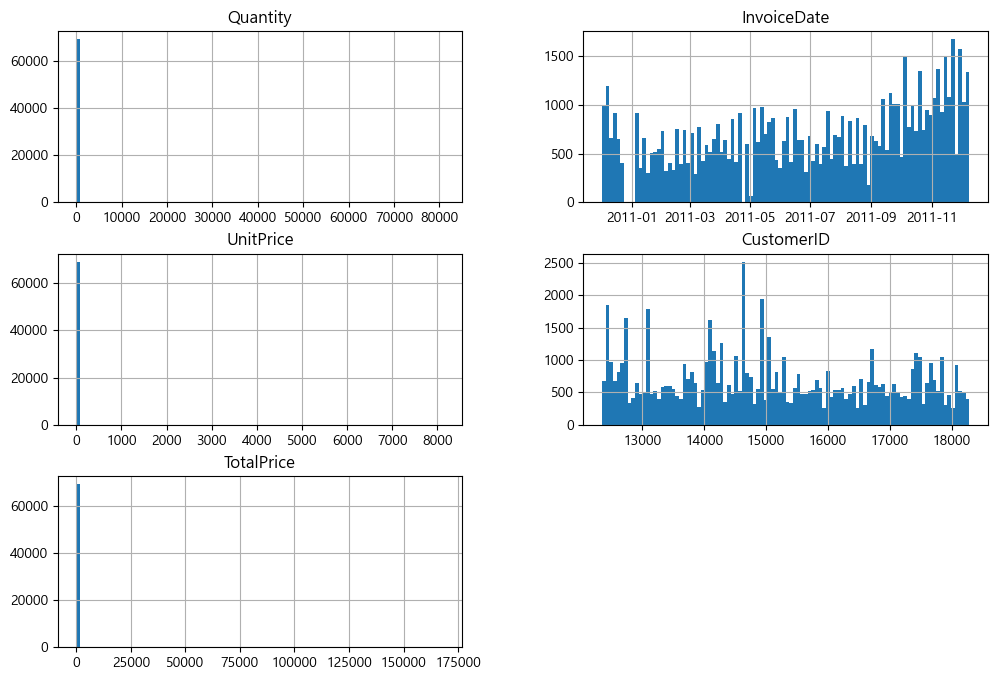

In [454]:
outliers.hist(bins=100, figsize=(12,8));

In [455]:
# 강의에서는 totalPrice 에서 160000보다 큰 값을 제외합니다 
raw_valid = raw_valid[raw_valid['TotalPrice'] < 160000].copy()
raw_valid.shape

(397883, 9)

### 중복 데이터 확인 
- 중복 데이터는 여러 이유로 발생할 수 있습니다. 새로고침 등 

In [456]:
# 중복 데이터만 모두 출력할때 False 옵션 둠 
# 첫번째 마지막꺼만 남기고 싶으면, first, last 옵션 씀 
raw_valid[raw_valid.duplicated(keep=False)].sort_values(['InvoiceNo','StockCode'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,4.95
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,4.95
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2.10
...,...,...,...,...,...,...,...,...,...
541655,581538,23275,SET OF 3 HANGING OWLS OLLIE BEAK,1,2011-12-09 11:34:00,1.25,14446.0,United Kingdom,1.25
541656,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom,2.49
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom,2.49
541666,581538,23343,JUMBO BAG VINTAGE CHRISTMAS,1,2011-12-09 11:34:00,2.08,14446.0,United Kingdom,2.08


In [457]:
df = raw_valid.drop_duplicates().copy()
df.shape

(392691, 9)

## RFM 계산

### 전체 주문에서 최근 주문일 구하기

In [458]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].head(2)

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [459]:
# 최근 거래 기준일 
last_timestamp = df['InvoiceDate'].max() + dt.timedelta(days=1)
last_timestamp

Timestamp('2011-12-10 12:50:00')

### Recency, Frequency, Monetary 값 구하기 

In [460]:
rfm = df.groupby('CustomerID').agg({'InvoiceDate' : lambda x: (last_timestamp - x.max()).days,
                              'InvoiceNo' : 'count',
                              'TotalPrice' : 'sum'})
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [461]:
rfm.rename(columns={'InvoiceDate' : 'Recency',
                    'InvoiceNo' : 'Frequency',
                    'TotalPrice' : 'MonetaryValue'}, inplace=True)
rfm

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


- 근데 해당 데이터는 1년 단위 계산밖에 없기 때문에 Length 컬럼도 추가 

In [462]:
# Length 계산
purchase_dates = df.groupby('CustomerID')['InvoiceDate'].agg(['min','max'])
purchase_dates['Length'] = (purchase_dates['max'] - purchase_dates['min']).dt.days
purchase_dates

,min,max,Length
CustomerID,,,
12346.0,2011-01-18 10:01:00,2011-01-18 10:01:00,0
12347.0,2010-12-07 14:57:00,2011-12-07 15:52:00,365
12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,282
12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,0
12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,0
...,...,...,...
18280.0,2011-03-07 09:52:00,2011-03-07 09:52:00,0
18281.0,2011-06-12 10:53:00,2011-06-12 10:53:00,0
18282.0,2011-08-05 13:35:00,2011-12-02 11:43:00,118


In [464]:
rfm = rfm.merge(purchase_dates['Length'], left_index=True, right_index=True, how='left')
rfm

,Recency,Frequency,MonetaryValue,Length_x,Length_y
CustomerID,,,,,
12346.0,326,1,77183.60,0,0
12347.0,2,182,4310.00,365,365
12348.0,75,31,1797.24,282,282
12349.0,19,73,1757.55,0,0
12350.0,310,17,334.40,0,0
...,...,...,...,...,...
18280.0,278,10,180.60,0,0
18281.0,181,7,80.82,0,0
18282.0,8,12,178.05,118,118


In [234]:
df_valid = df_valid.merge(rfm.reset_index(), on='CustomerID', how='left')
df_valid.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,diffDays,...,CohortIndex,InvoiceDateFirstYM,Recency_x,Frequency_x,MonetaryValue_x,Length_x,Recency_y,Frequency_y,MonetaryValue_y,Length_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,302.0,...,1,2010-12,372,297,5391.21,1,372,297,5391.21,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,...,1,2010-12,372,297,5391.21,1,372,297,5391.21,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,302.0,...,1,2010-12,372,297,5391.21,1,372,297,5391.21,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,...,1,2010-12,372,297,5391.21,1,372,297,5391.21,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,...,1,2010-12,372,297,5391.21,1,372,297,5391.21,1


In [491]:
rfm

,Recency,Frequency,MonetaryValue,Length
CustomerID,,,,
12346.0,326,1,77183.60,0
12347.0,2,182,4310.00,365
12348.0,75,31,1797.24,282
12349.0,19,73,1757.55,0
12350.0,310,17,334.40,0
...,...,...,...,...
18280.0,278,10,180.60,0
18281.0,181,7,80.82,0
18282.0,8,12,178.05,118


In [492]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 392691
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           392692 non-null  object        
 1   StockCode           392692 non-null  object        
 2   Description         392692 non-null  object        
 3   Quantity            392692 non-null  int64         
 4   InvoiceDate         392692 non-null  datetime64[ns]
 5   UnitPrice           392692 non-null  float64       
 6   CustomerID          392692 non-null  float64       
 7   Country             392692 non-null  object        
 8   TotalPrice          392692 non-null  float64       
 9   diffDays            392692 non-null  float64       
 10  isRegistered        392692 non-null  bool          
 11  InvoiceCode         392692 non-null  object        
 12  isCancel            392692 non-null  bool          
 13  InvoiceYear         392692 non-nul

In [493]:
rfm.describe()

,Recency,Frequency,MonetaryValue,Length
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,92.583679,90.523513,2009.852304,130.401568
std,100.019339,225.507058,8622.507371,132.049680
min,1.000000,1.000000,2.900000,0.000000
25%,18.000000,17.000000,306.452500,0.000000
50%,51.000000,41.000000,668.495000,92.000000
75%,142.750000,98.000000,1659.132500,251.750000
max,374.000000,7676.000000,280206.020000,373.000000


### 

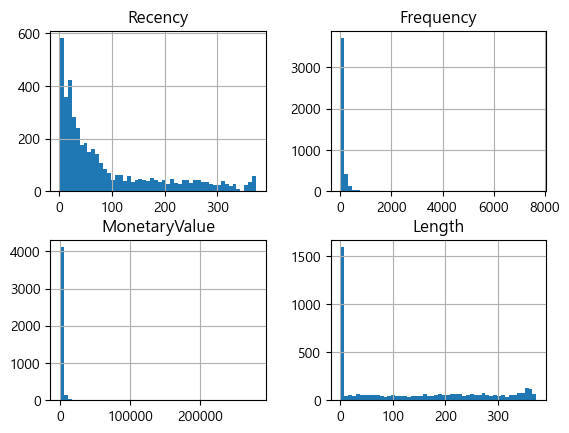

In [494]:
rfm.hist(bins=50);

<Axes: >

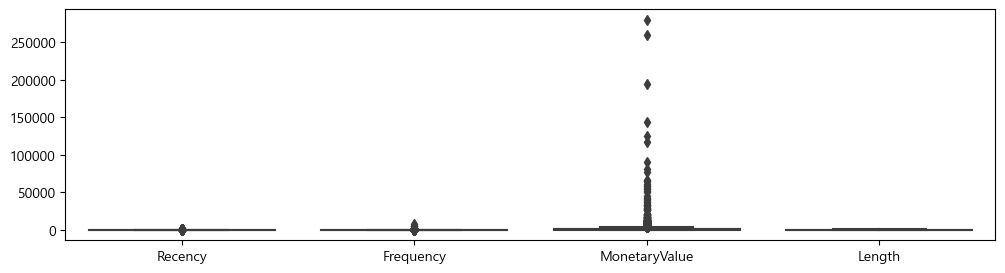

In [495]:
plt.figure(figsize=(12,3))
sns.boxplot(rfm)

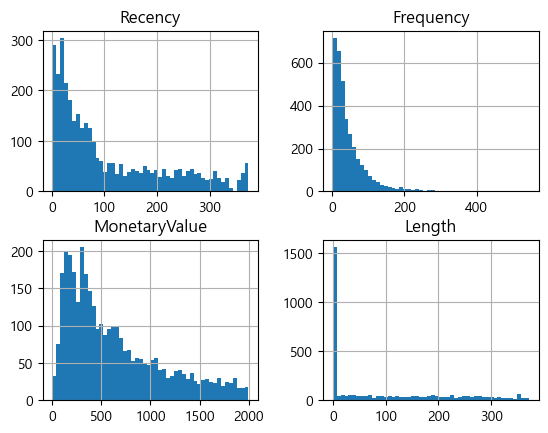

In [496]:
rfm[rfm['MonetaryValue'] < 2000].hist(bins=50);

In [497]:
rfm[rfm['MonetaryValue'] < 2000]
# 4분위수 이하에 해당하는 데이터들을 필터링 했을 때 3443으로 데이터가 축소됨 

,Recency,Frequency,MonetaryValue,Length
CustomerID,,,,
12348.0,75,31,1797.24,282
12349.0,19,73,1757.55,0
12350.0,310,17,334.40,0
12353.0,204,4,89.00,0
12354.0,232,58,1079.40,0
...,...,...,...,...
18278.0,74,9,173.90,0
18280.0,278,10,180.60,0
18281.0,181,7,80.82,0


<Axes: xlabel='Recency'>

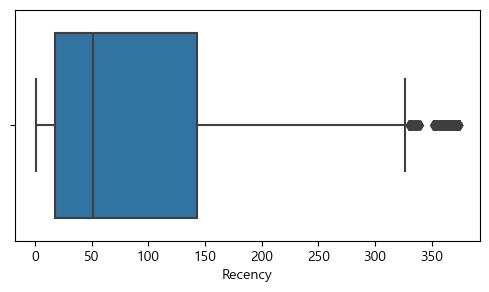

In [498]:
plt.figure(figsize=(6,3))
sns.boxplot(data=rfm, x='Recency')

## RFML 데이터 모형 
- Length 가 0인 고객들을 추후 구매일 예측
- Length 가 0인 고객들에 대해 구매 시점을 예측. 모델의 예측 결과를 기반으로, 해당 고객들이 다시 구매할 가능성이 있는지 시점을 추정 

In [499]:
# 먼저 Length 가 0인 고객들과 아닌 고객들 필터링 
df_no_purchase = rfm[rfm['Length']==0]
df_no_purchase

,Recency,Frequency,MonetaryValue,Length
CustomerID,,,,
12346.0,326,1,77183.60,0
12349.0,19,73,1757.55,0
12350.0,310,17,334.40,0
12353.0,204,4,89.00,0
12354.0,232,58,1079.40,0
...,...,...,...,...
18276.0,44,14,335.86,0
18277.0,58,8,110.38,0
18278.0,74,9,173.90,0


In [542]:
from statsmodels.tsa.arima.model import ARIMA

# 데이터 필터링 
df_customers = df_valid[['CustomerID', 'InvoiceDate', 'Frequency', 'MonetaryValue']]
df_customers

,CustomerID,InvoiceDate,Frequency,MonetaryValue
0,17850.0,2010-12-01 08:26:00,297,5391.21
1,17850.0,2010-12-01 08:26:00,297,5391.21
2,17850.0,2010-12-01 08:26:00,297,5391.21
3,17850.0,2010-12-01 08:26:00,297,5391.21
4,17850.0,2010-12-01 08:26:00,297,5391.21
...,...,...,...,...
392687,12680.0,2011-12-09 12:50:00,52,862.81
392688,12680.0,2011-12-09 12:50:00,52,862.81
392689,12680.0,2011-12-09 12:50:00,52,862.81
392690,12680.0,2011-12-09 12:50:00,52,862.81


In [531]:
df_monthly = df_customers.groupby('CustomerID').resample('M').sum()
df_monthly

CustomerID  Frequency  MonetaryValue
CustomerID InvoiceDate                                      
12346.0    2011-01-31      12346.0          1       77183.60
12347.0    2010-12-31     382757.0       5642      133610.00
           2011-01-31     358063.0       5278      124990.00
           2011-02-28          0.0          0           0.00
           2011-03-31          0.0          0           0.00
...                            ...        ...            ...
18287.0    2011-06-30          0.0          0           0.00
           2011-07-31          0.0          0           0.00
           2011-08-31          0.0          0           0.00
           2011-09-30          0.0          0           0.00
           2011-10-31     749767.0       2870       75328.48

[22826 rows x 3 columns]

In [534]:
df_monthly = df_monthly.drop(columns='CustomerID').reset_index()
df_monthly

,CustomerID,InvoiceDate,Frequency,MonetaryValue
0,12346.0,2011-01-31,1,77183.60
1,12347.0,2010-12-31,5642,133610.00
2,12347.0,2011-01-31,5278,124990.00
3,12347.0,2011-02-28,0,0.00
4,12347.0,2011-03-31,0,0.00
...,...,...,...,...
22821,18287.0,2011-06-30,0,0.00
22822,18287.0,2011-07-31,0,0.00
22823,18287.0,2011-08-31,0,0.00
22824,18287.0,2011-09-30,0,0.00


In [544]:
rfm

,Recency,Frequency,MonetaryValue,Length
CustomerID,,,,
12346.0,326,1,77183.60,0
12347.0,2,182,4310.00,365
12348.0,75,31,1797.24,282
12349.0,19,73,1757.55,0
12350.0,310,17,334.40,0
...,...,...,...,...
18280.0,278,10,180.60,0
18281.0,181,7,80.82,0
18282.0,8,12,178.05,118


In [522]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 392691
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   CustomerID     392692 non-null  float64       
 1   InvoiceDate    392692 non-null  datetime64[ns]
 2   Frequency      392692 non-null  int64         
 3   MonetaryValue  392692 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 15.0 MB


## RFM 모형 만들기 
- 각각 5등급으로 등간격
- 마케팅 등급을 세분화 해서 등급별 세그먼테이션을 나눠보자 

In [243]:
r_labels = list(range(5,0,-1))
f_labels = list(range(1,6,1))
m_labels = list(range(1,6,1))
l_labels = list(range(5,0,-1))
cut_size = 5

In [244]:
r_qcut = pd.qcut(x=rfm['Recency'], q=cut_size, labels=r_labels)
r_qcut

CustomerID
12346.0    1
12347.0    5
12348.0    2
12349.0    4
12350.0    1
          ..
18280.0    1
18281.0    1
18282.0    5
18283.0    5
18287.0    3
Name: Recency, Length: 4338, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]

In [245]:
r_qcut.value_counts(1)

Recency
4    0.204703
5    0.203550
1    0.199631
3    0.197787
2    0.194329
Name: proportion, dtype: float64

In [246]:
f_qcut = pd.qcut(x=rfm['Frequency'], q=cut_size, labels=f_labels)
m_qcut = pd.qcut(x=rfm['MonetaryValue'], q=cut_size, labels=m_labels)

In [247]:
rfm['Length'].value_counts()

Length
0      1556
364      25
357      24
365      23
350      21
       ... 
144       1
373       1
100       1
178       1
18        1
Name: count, Length: 374, dtype: int64

In [248]:
import numpy as np

# 데이터의 최소값과 최대값을 기반으로 구간 생성
bins = np.linspace(rfm['Length'].min(), rfm['Length'].max(), cut_size + 1)
l_labels = list(range(5,0,-1))

# pd.cut으로 구간 나누기
l_qcut = pd.cut(rfm['Length'], bins=bins, labels=l_labels, include_lowest=True)
l_qcut.value_counts()

Length
5    2065
1     717
2     574
3     545
4     437
Name: count, dtype: int64

- 흠.. Length 는 RFM 점수에 못 쓰겠음. max-min 이 0 이 가장 많아서 qcut으로 동일한 비율로 등급을 나눌 수 가 없음. 다른 컬럼이랑 기준이 동일하게 적용 되지 않으니깐 제거 하는게 낫다고 판단 

In [249]:
rfm.drop(columns = 'Length', inplace=True)
rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [250]:
# 만든 rfm 점수를 컬럼에 추가하자 
rfm = rfm.assign(R=r_qcut, F = f_qcut, M = m_qcut)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,5
12347.0,2,182,4310.00,5,5,5
12348.0,75,31,1797.24,2,3,4
12349.0,19,73,1757.55,4,4,4
12350.0,310,17,334.40,1,2,2


### RFM Segment

In [251]:
rfm['RFM_segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

In [252]:
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,5,115
12347.0,2,182,4310.00,5,5,5,555
12348.0,75,31,1797.24,2,3,4,234
12349.0,19,73,1757.55,4,4,4,444
12350.0,310,17,334.40,1,2,2,122
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111
18281.0,181,7,80.82,1,1,1,111
18282.0,8,12,178.05,5,1,1,511


- 고가 물건을 조금씩 사는 사람
- 저가 물건을 자주 사는 사람 대상으로 마케팅 세그먼트를 나누자

In [253]:
rfm['RFM_score'] = rfm[['R','F','M']].astype(int).sum(axis=1)
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7
12347.0,2,182,4310.00,5,5,5,555,15
12348.0,75,31,1797.24,2,3,4,234,9
12349.0,19,73,1757.55,4,4,4,444,12
12350.0,310,17,334.40,1,2,2,122,5
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3
18281.0,181,7,80.82,1,1,1,111,3
18282.0,8,12,178.05,5,1,1,511,7


<Axes: xlabel='RFM_segment', ylabel='RFM_score'>

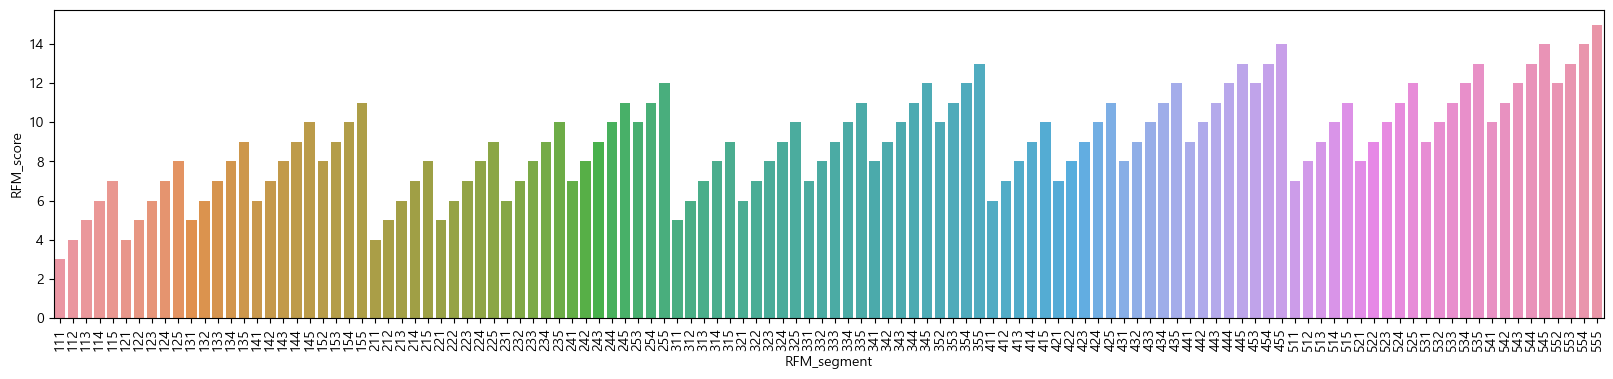

In [254]:
# RFM_segment 값에 따라 정렬 
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.barplot(data=rfm.sort_values('RFM_segment'), x='RFM_segment', y='RFM_score')

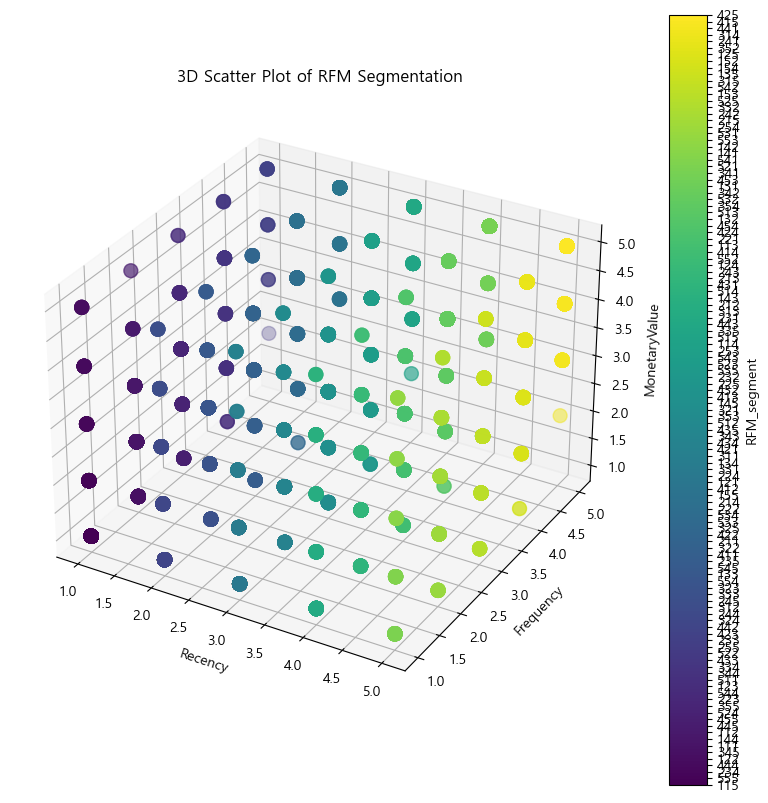

In [255]:
# 3D 플롯을 위한 Axes3D 객체 생성
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 데이터 추출
x = rfm['R']
y = rfm['F']
z = rfm['M']

# 데이터 포인트의 색상 결정 (RFM_segment를 기반으로)
colors = rfm['RFM_segment'].astype('category').cat.codes  # 카테고리형으로 변환 후 코드화

# 3D 산점도 플롯
scatter = ax.scatter(x, y, z, c=colors, cmap='viridis', s=100)

# 축 레이블 설정
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('MonetaryValue')

# 색상 바 추가
cbar = plt.colorbar(scatter, ax=ax, label='RFM_segment')
cbar.set_ticks(range(len(rfm['RFM_segment'].unique())))
cbar.set_ticklabels(rfm['RFM_segment'].unique())

plt.title('3D Scatter Plot of RFM Segmentation')
plt.show()

In [256]:
rfm.groupby('RFM_score').agg({'Recency':'mean',
                              'Frequency' : 'mean',
                              'MonetaryValue' : ['mean','sum']}).style.background_gradient().format('{:,.0f}')

## 고객군 나누기 
- 3등급 -> silver, gold, platinum

In [257]:
rfm['RFM_class'] = pd.qcut(x=rfm['RFM_score'], q=3, labels=['silver','gold','platinum'])
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7,silver
12347.0,2,182,4310.00,5,5,5,555,15,platinum
12348.0,75,31,1797.24,2,3,4,234,9,gold
12349.0,19,73,1757.55,4,4,4,444,12,platinum
12350.0,310,17,334.40,1,2,2,122,5,silver


In [258]:
rfm.groupby('RFM_class')['RFM_score'].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
silver,1668.0,5.209832,1.384324,3.0,4.0,5.0,6.0,7.0
gold,1409.0,9.469127,1.114505,8.0,8.0,9.0,10.0,11.0
platinum,1261.0,13.471055,1.124120,12.0,12.0,13.0,14.0,15.0


<Axes: xlabel='RFM_class', ylabel='RFM_score'>

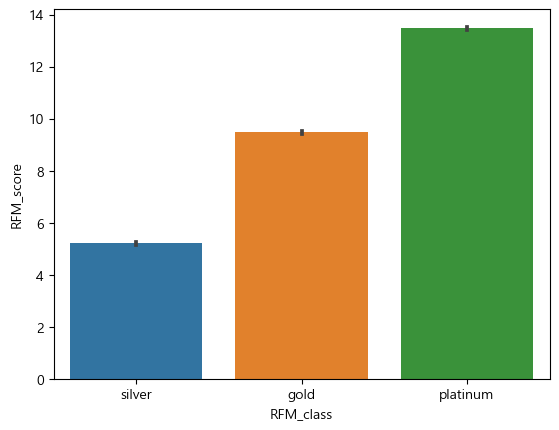

In [259]:
sns.barplot(data=rfm, x='RFM_class', y='RFM_score')

<Axes: xlabel='RFM_class', ylabel='RFM_score'>

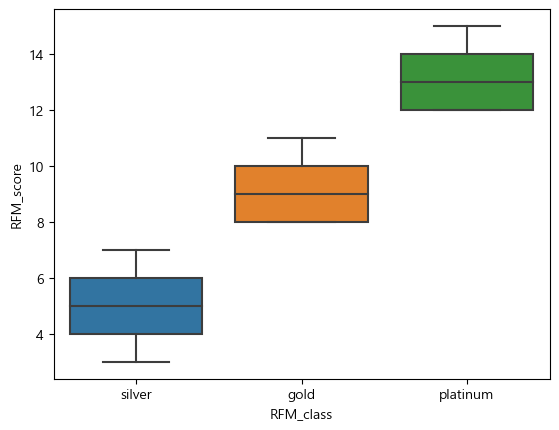

In [260]:
sns.boxplot(data=rfm, x='RFM_class', y='RFM_score')

<Axes: xlabel='R', ylabel='RFM_score'>

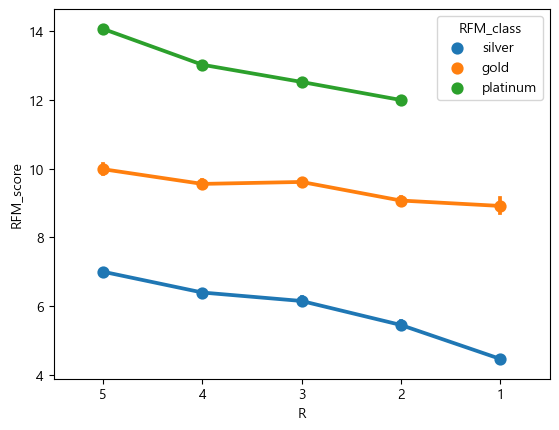

In [261]:
sns.pointplot(data=rfm, x='R', y='RFM_score', hue='RFM_class')

<Axes: xlabel='F', ylabel='RFM_score'>

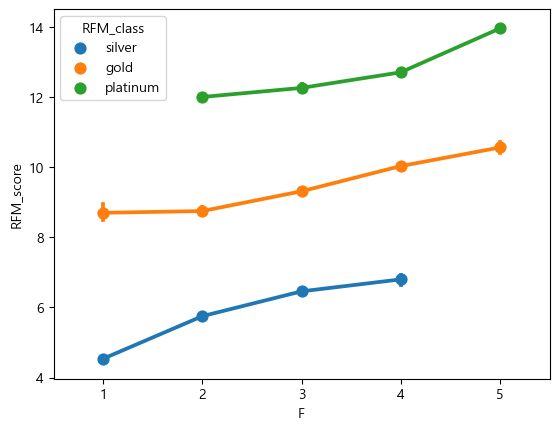

In [262]:
sns.pointplot(data=rfm, x='F', y='RFM_score', hue='RFM_class')

<Axes: xlabel='M', ylabel='RFM_score'>

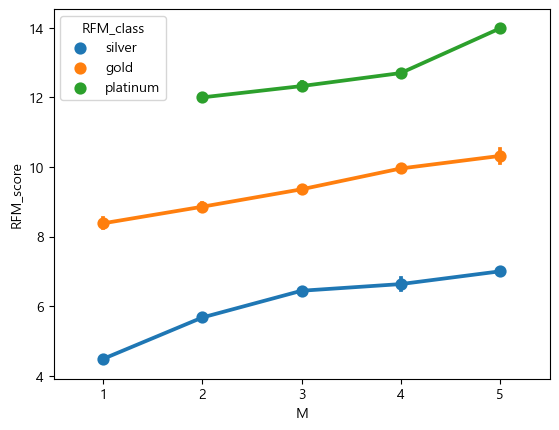

In [263]:
sns.pointplot(data=rfm, x='M', y='RFM_score', hue='RFM_class')

In [264]:
rfm.groupby('RFM_class').agg({'Recency' : 'mean',
                             'Frequency' : 'mean',
                             'MonetaryValue' : ['mean','sum','count']})

Recency   Frequency MonetaryValue                   
                 mean        mean          mean          sum count
RFM_class                                                         
silver     170.072542   17.068945    411.232339   685935.542  1668
gold        65.855926   55.664301   1005.104153  1416191.752  1409
platinum    19.949247  226.636796   5247.114988  6616612.000  1261

In [265]:
rfm.groupby('RFM_class').agg({'Recency' : 'mean',
                             'Frequency' : 'mean',
                             'MonetaryValue' : ['mean','sum','count']}).style.background_gradient().format("{:,.0f}")

C:\Users\jkj12\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


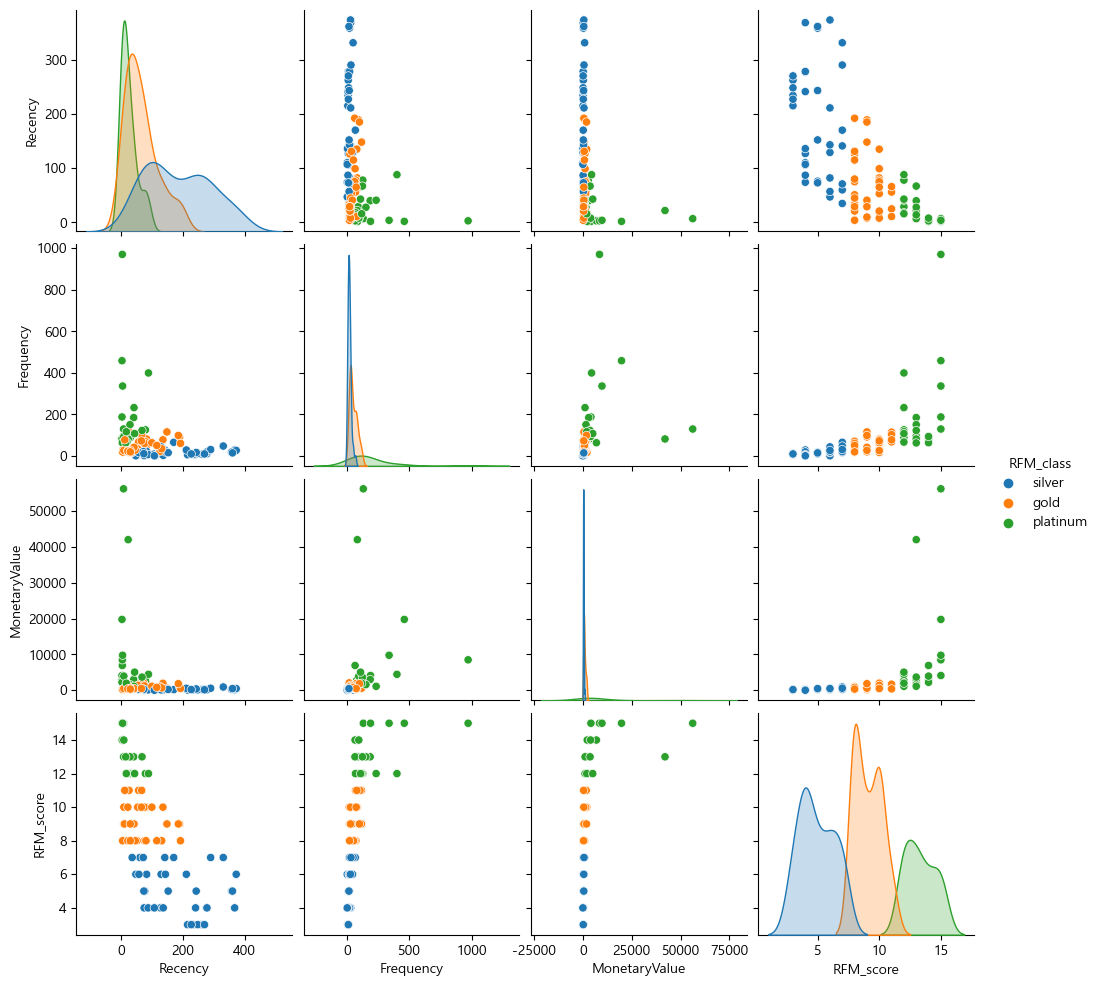

In [266]:
sns.pairplot(data=rfm.sample(100), hue = 'RFM_class')

In [267]:
corr = rfm.select_dtypes(include='number').corr()
corr

,Recency,Frequency,MonetaryValue,RFM_score
Recency,1.000000,-0.206618,-0.122937,-0.700621
Frequency,-0.206618,1.000000,0.444920,0.404260
MonetaryValue,-0.122937,0.444920,1.000000,0.250433
RFM_score,-0.700621,0.404260,0.250433,1.000000


In [268]:
mask = np.triu(np.ones_like(corr))
mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

<Axes: >

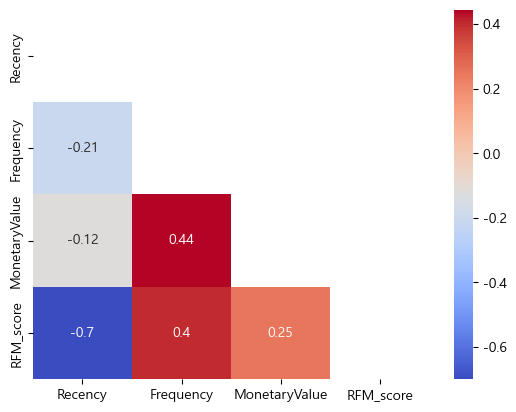

In [269]:
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)

In [270]:
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7,silver
12347.0,2,182,4310.00,5,5,5,555,15,platinum
12348.0,75,31,1797.24,2,3,4,234,9,gold
12349.0,19,73,1757.55,4,4,4,444,12,platinum
12350.0,310,17,334.40,1,2,2,122,5,silver


In [271]:
#rfm.to_csv('rfm.csv')

---

## 군집화 (머신러닝)

In [272]:
pd.read_csv('./rfm.csv')

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
0,12346.0,326,1,77183.60,1,1,5,115,7,silver
1,12347.0,2,182,4310.00,5,5,5,555,15,platinum
2,12348.0,75,31,1797.24,2,3,4,234,9,gold
3,12349.0,19,73,1757.55,4,4,4,444,12,platinum
4,12350.0,310,17,334.40,1,2,2,122,5,silver
...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,278,10,180.60,1,1,1,111,3,silver
4334,18281.0,181,7,80.82,1,1,1,111,3,silver
4335,18282.0,8,12,178.05,5,1,1,511,7,silver
4336,18283.0,4,721,2045.53,5,5,4,554,14,platinum


In [273]:
rfm.shape
#4338명 클러스터링 

(4338, 9)

In [274]:
rfm_cluster = rfm.iloc[:,:3]
rfm_cluster

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [275]:
rfm_cluster.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,92.583679,90.523513,2009.852304
std,100.019339,225.507058,8622.507371
min,1.000000,1.000000,2.900000
25%,18.000000,17.000000,306.452500
50%,51.000000,41.000000,668.495000
75%,142.750000,98.000000,1659.132500
max,374.000000,7676.000000,280206.020000


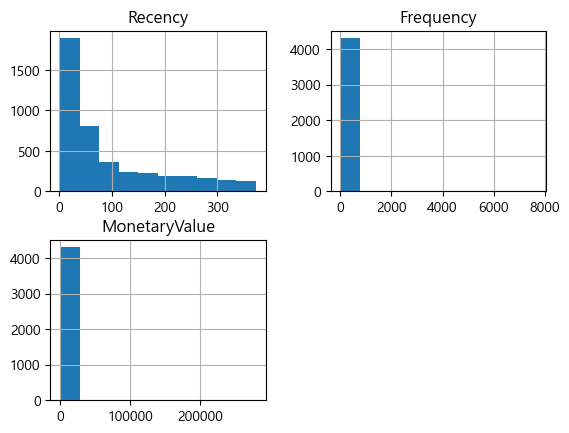

In [276]:
rfm_cluster.hist();

### 로그 변환 
- 머신러닝 모델이 잘 이해할 수 있도록 정규분포 형태로 변환

In [277]:
rfm_cluster_log = np.log1p(rfm_cluster)
rfm_cluster_log.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,5.789960,0.693147,11.253955
12347.0,1.098612,5.209486,8.368925
12348.0,4.330733,3.465736,7.494564
12349.0,2.995732,4.304065,7.472245
12350.0,5.739793,2.890372,5.815324


In [278]:
rfm_cluster_log.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,3.831803,3.728972,6.586102
std,1.339608,1.245411,1.258222
min,0.693147,0.693147,1.360977
25%,2.944439,2.890372,5.728321
50%,3.951244,3.737670,6.506524
75%,4.968071,4.595120,7.414652
max,5.926926,8.945984,12.543284


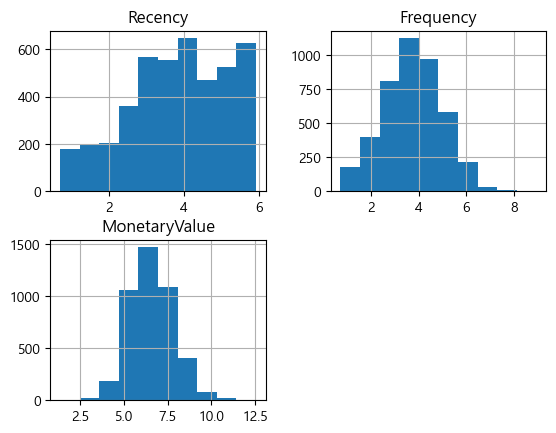

In [279]:
rfm_cluster_log.hist();

### 스케일 조정하기

In [280]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
X = ss.fit_transform(rfm_cluster_log)

In [281]:
pd.DataFrame(X).describe().round(2)
# StandardScaler 적용된 데이터는 평균 0, 편차 1로 가깝게 만들어짐 

,0,1,2
count,4338.00,4338.00,4338.00
mean,0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-2.34,-2.44,-4.15
25%,-0.66,-0.67,-0.68
50%,0.09,0.01,-0.06
75%,0.85,0.70,0.66
max,1.56,4.19,4.74


In [282]:
ss = StandardScaler()
X = ss.fit_transform(rfm_cluster_log)
X = pd.DataFrame(X, columns = rfm_cluster_log.columns)
X

,Recency,Frequency,MonetaryValue
0,1.461907,-2.437889,3.710308
1,-2.040527,1.188913,1.417102
2,0.372488,-0.211389,0.722104
3,-0.624188,0.461823,0.704363
4,1.424454,-0.673430,-0.612664
...,...,...,...
4333,1.343390,-1.068908,-1.100326
4334,1.024450,-1.324639,-1.734059
4335,-1.220333,-0.934757,-1.111567
4336,-1.659158,2.291117,0.824909


In [283]:
X.describe().round(2)

,Recency,Frequency,MonetaryValue
count,4338.00,4338.00,4338.00
mean,0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-2.34,-2.44,-4.15
25%,-0.66,-0.67,-0.68
50%,0.09,0.01,-0.06
75%,0.85,0.70,0.66
max,1.56,4.19,4.74


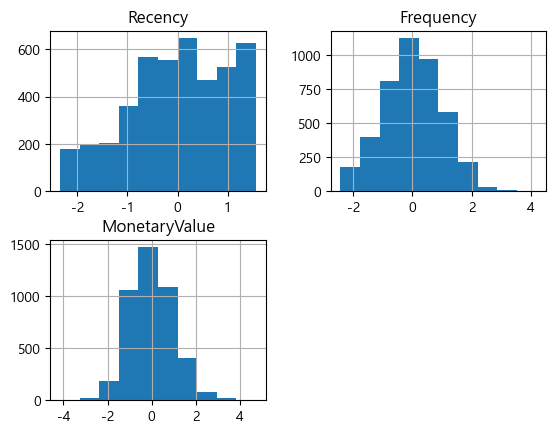

In [284]:
X.hist();

In [285]:
from sklearn.cluster import KMeans

kmean = KMeans(n_init='auto',random_state=42)
kmean.fit(X)
kmean.cluster_centers_, kmean.inertia_
# inertia_ 는 군집간 거리 (성능지표)

(array([[-0.36897607, -0.66984552, -0.80897528],
        [ 0.42384092,  0.20266805,  0.10666179],
        [-1.50089666,  1.58646594,  1.71175944],
        [-0.12920724,  0.99451208,  0.98845587],
        [ 1.14140717, -0.49988931, -0.68458615],
        [-1.19169688,  0.38878091,  0.27673355],
        [ 1.00027544, -1.59759399, -1.48142454],
        [ 0.51375114, -1.3675099 ,  0.25709927]]),
 2784.2214944948987)

In [286]:
kmean.cluster_centers_.shape

(8, 3)

### Within-Cluster Sum of Square 값으로 군집의 수 찾기

In [287]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [288]:
inertia = []
silhouettes = []
range_n_clusters = range(2,21)

for n_cluster in range(2,21):
    kmeans = KMeans(n_clusters = n_cluster, n_init='auto',random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels=kmeans.labels_))
    print(n_cluster, end=',')

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,

### Elbow Method

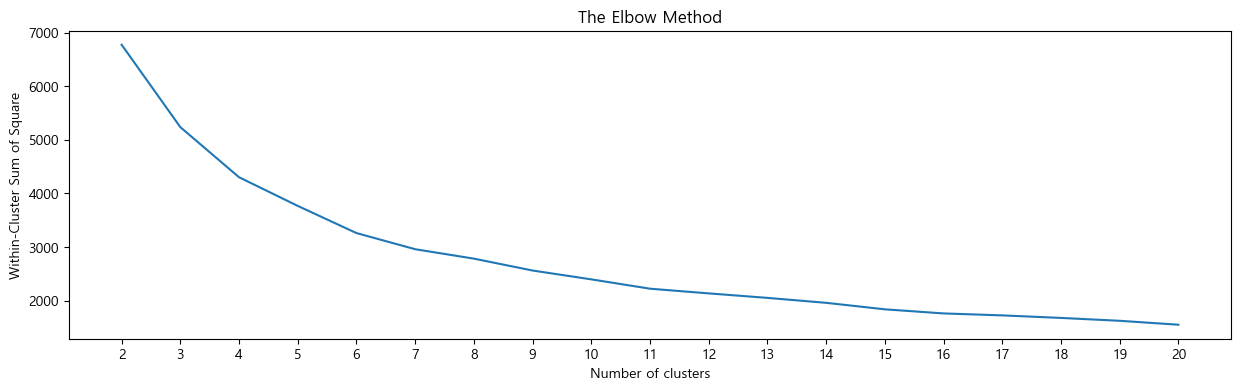

In [290]:
plt.figure(figsize=(15,4))
plt.plot(range_n_clusters, inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.xticks(range_n_clusters)
plt.show()

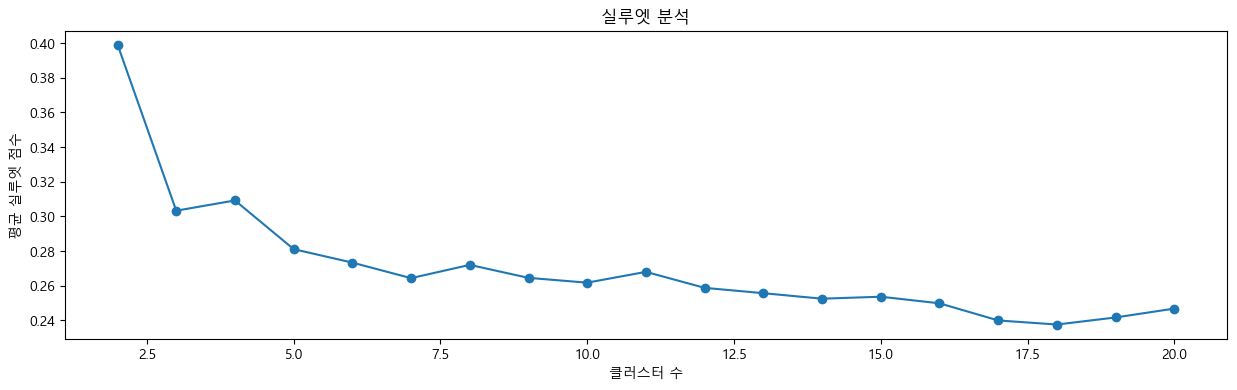

In [292]:
# 실루엣 분석 시각화
plt.figure(figsize=(15,4))
plt.plot(range_n_clusters, silhouettes, marker='o')
plt.title('실루엣 분석')
plt.xlabel('클러스터 수')
plt.ylabel('평균 실루엣 점수')
plt.show()

C:\Users\jkj12\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


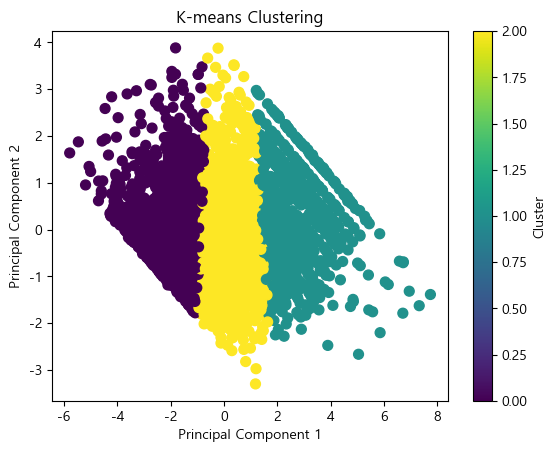

In [295]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_features = pca.fit_transform(rfm_cluster_log)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_features)

rfm_cluster['Cluster'] = clusters

# 클러스터 시각화 (PCA 축소된 2차원 데이터 기준)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

### 클러스터링 분석

In [296]:
# 각 클러스터의 평균 특성
cluster_summary = rfm_cluster.groupby('Cluster').mean()
print(cluster_summary)

# 각 클러스터의 고객 수
cluster_counts = rfm_cluster['Cluster'].value_counts()
print(cluster_counts)

            Recency   Frequency  MonetaryValue
Cluster                                       
0        176.754889   15.720339     302.741774
1         13.102591  258.866321    6320.251720
2         64.079391   64.584013    1171.990486
Cluster
2    1839
0    1534
1     965
Name: count, dtype: int64


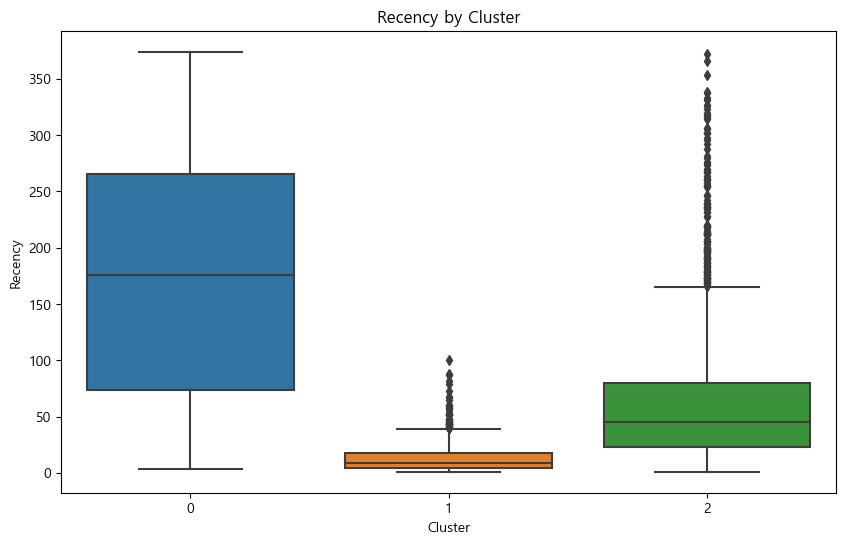

In [300]:
import seaborn as sns

# 클러스터별 분포 시각화 (예: Recency)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Recency', data=rfm_cluster)
plt.title('Recency by Cluster')
plt.show()

In [298]:
# 클러스터별 평균 특성
cluster_summary = rfm_cluster.groupby('Cluster').mean()

# 클러스터별 중앙값 특성
cluster_median = rfm_cluster.groupby('Cluster').median()

print("클러스터별 평균:")
print(cluster_summary)

print("\n클러스터별 중앙값:")
print(cluster_median)

클러스터별 평균:
            Recency   Frequency  MonetaryValue
Cluster                                       
0        176.754889   15.720339     302.741774
1         13.102591  258.866321    6320.251720
2         64.079391   64.584013    1171.990486

클러스터별 중앙값:
         Recency  Frequency  MonetaryValue
Cluster                                   
0          176.0       13.0        241.075
1            9.0      173.0       2953.590
2           45.0       52.0        825.800


In [299]:
# 각 클러스터의 고객 수
cluster_counts = rfm_cluster['Cluster'].value_counts()
print("클러스터별 고객 수:")
print(cluster_counts)

클러스터별 고객 수:
Cluster
2    1839
0    1534
1     965
Name: count, dtype: int64


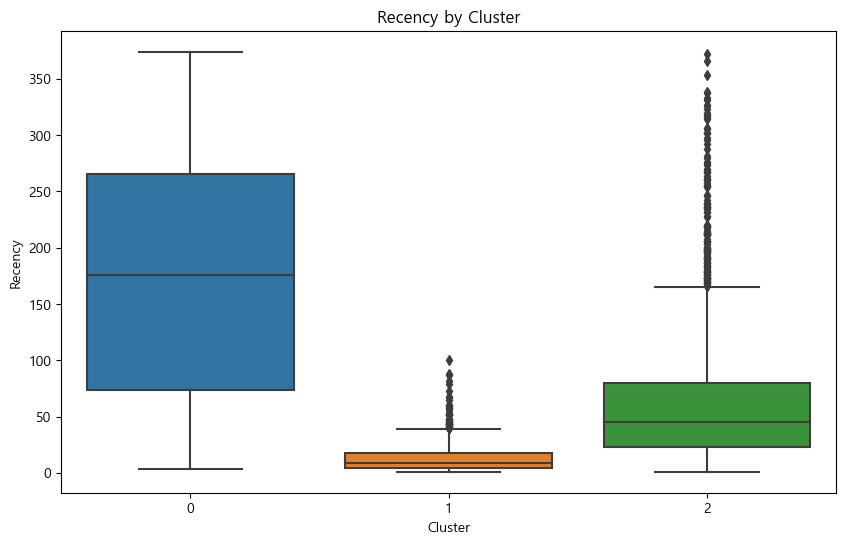

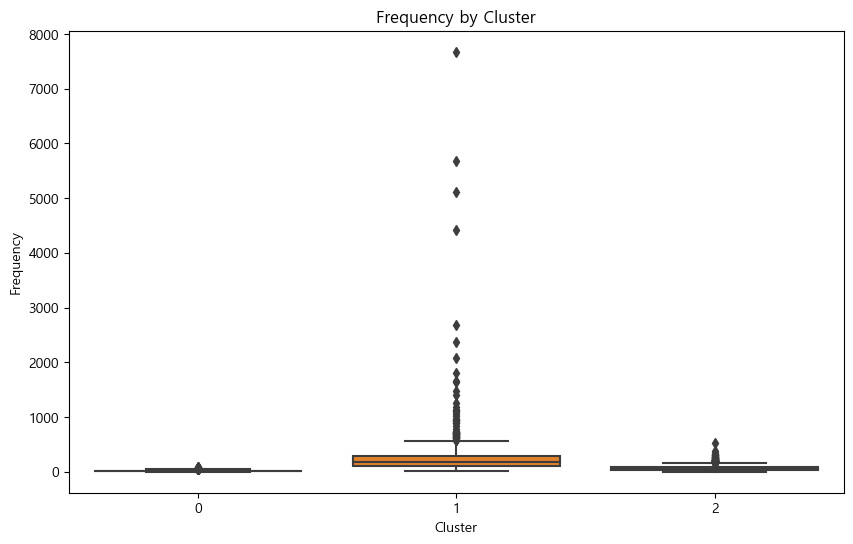

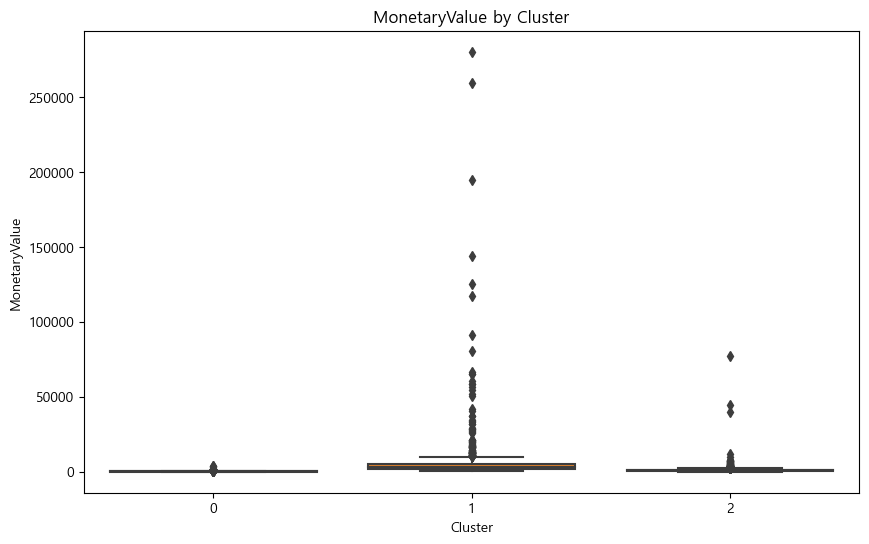

In [301]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예: Recency, Frequency, MonetaryValue 특성 시각화
features = ['Recency', 'Frequency', 'MonetaryValue']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=rfm_cluster)
    plt.title(f'{feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

C:\Users\jkj12\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


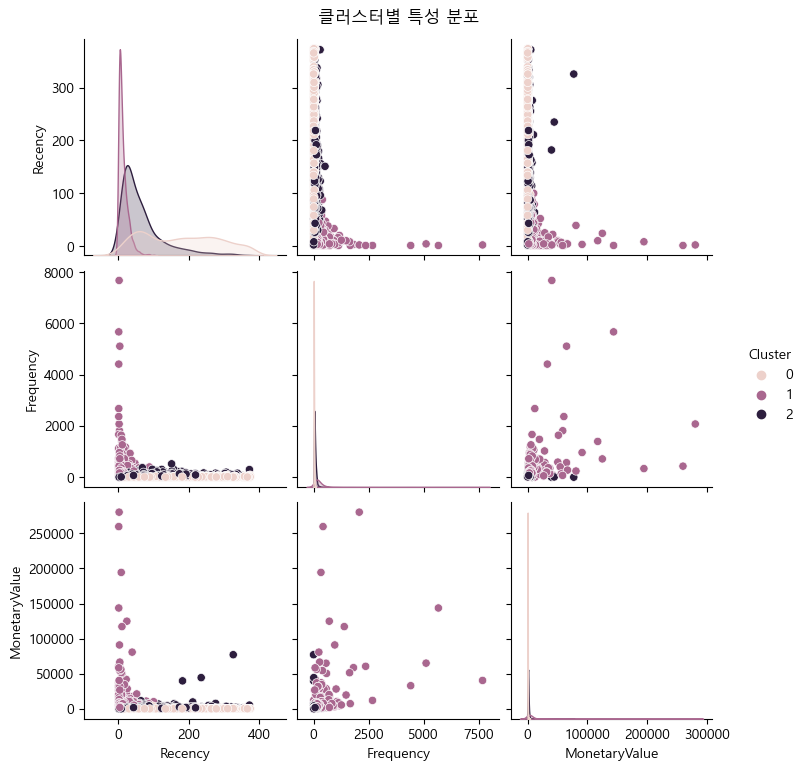

In [302]:
# 클러스터별 Recency, Frequency, MonetaryValue의 분포 시각화
sns.pairplot(rfm_cluster, hue='Cluster', vars=features)
plt.suptitle('클러스터별 특성 분포', y=1.02)
plt.show()

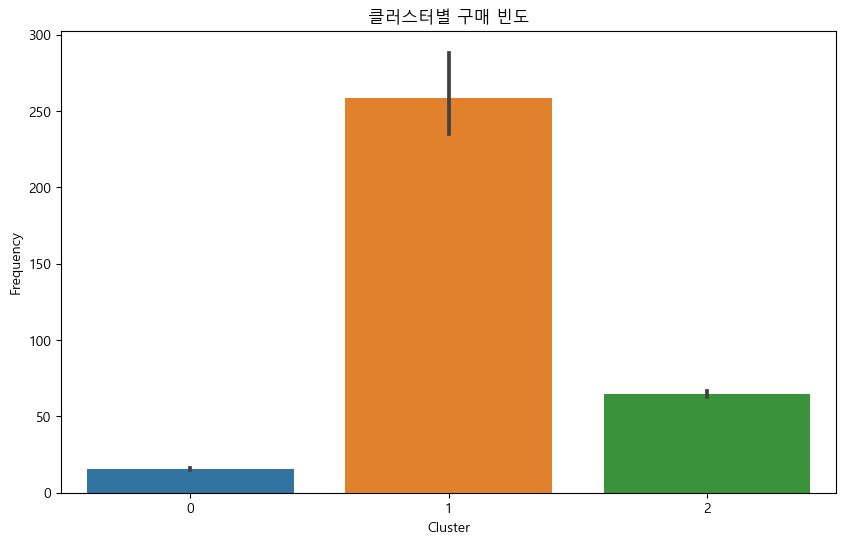

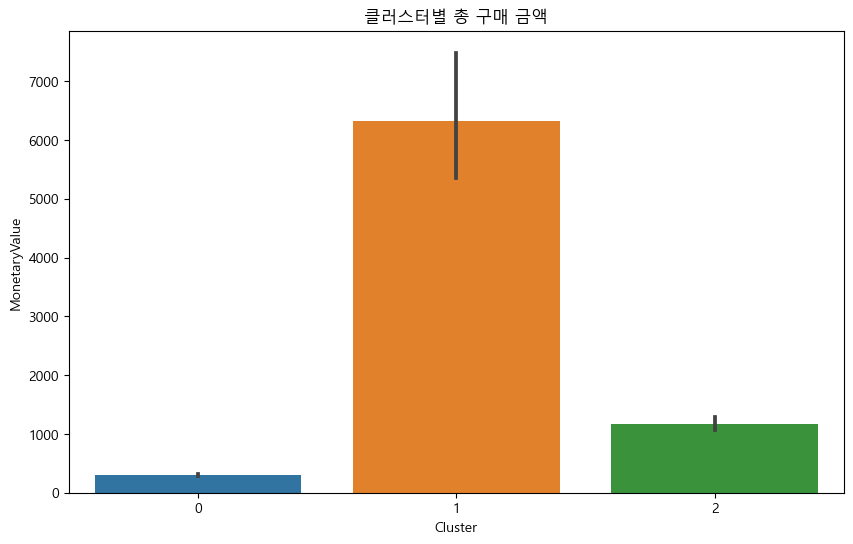

In [303]:
# 클러스터별 구매 빈도
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Frequency', data=rfm_cluster)
plt.title('클러스터별 구매 빈도')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()

# 클러스터별 총 구매 금액
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='MonetaryValue', data=rfm_cluster)
plt.title('클러스터별 총 구매 금액')
plt.xlabel('Cluster')
plt.ylabel('MonetaryValue')
plt.show()

### 클러스터링 결과에 대한 인사이트 도출
각 클러스터의 분석 결과를 바탕으로 고객 세그멘테이션에 대한 인사이트를 도출합니다. 이를 통해 비즈니스 전략을 수립하거나 마케팅 캠페인을 계획할 수 있습니다.

4.1 고객 프로파일 생성
각 클러스터의 주요 특성을 바탕으로 고객 프로파일을 작성합니다. 예를 들어:

클러스터 1: 가격 민감한 고객, 높은 구매 빈도, 낮은 평균 구매 금액
클러스터 2: 고액 구매 고객, 낮은 구매 빈도, 높은 평균 구매 금액
클러스터 3: 신규 고객, 중간 정도의 구매 빈도와 금액
4.2 마케팅 전략 수립
각 클러스터에 맞는 마케팅 전략을 수립합니다. 예를 들어:

클러스터 1: 할인 쿠폰 및 프로모션을 통해 재구매 유도
클러스터 2: 프리미엄 제품 추천 및 맞춤형 서비스 제공
클러스터 3: 고객 유지를 위한 인센티브 제공 및 맞춤형 온보딩

## 고객별 월별 매출액 비교 

In [138]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

data = pd.read_csv('./df_valid.csv', index_col=0)
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,diffDays,...,InvoiceYM,InvoiceTime,Invoicehour,InvoiceDateFirst,CohortIndex,InvoiceDateFirstYM,Recency,Frequency,MonetaryValue,Length
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,302.0,...,2010-12,08:26:00,8,2010-12-01 08:26:00,1,2010-12,372,297,5391.21,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,...,2010-12,08:26:00,8,2010-12-01 08:26:00,1,2010-12,372,297,5391.21,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,302.0,...,2010-12,08:26:00,8,2010-12-01 08:26:00,1,2010-12,372,297,5391.21,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,...,2010-12,08:26:00,8,2010-12-01 08:26:00,1,2010-12,372,297,5391.21,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,...,2010-12,08:26:00,8,2010-12-01 08:26:00,1,2010-12,372,297,5391.21,1
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,302.0,...,2010-12,08:26:00,8,2010-12-01 08:26:00,1,2010-12,372,297,5391.21,1
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,302.0,...,2010-12,08:26:00,8,2010-12-01 08:26:00,1,2010-12,372,297,5391.21,1
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,302.0,...,2010-12,08:28:00,8,2010-12-01 08:26:00,1,2010-12,372,297,5391.21,1
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,302.0,...,2010-12,08:28:00,8,2010-12-01 08:26:00,1,2010-12,372,297,5391.21,1
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,32.0,...,2010-12,08:34:00,8,2010-12-01 08:34:00,1,2010-12,32,172,3237.54,342


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 392691
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   InvoiceNo           392692 non-null  int64  
 1   StockCode           392692 non-null  object 
 2   Description         392692 non-null  object 
 3   Quantity            392692 non-null  int64  
 4   InvoiceDate         392692 non-null  object 
 5   UnitPrice           392692 non-null  float64
 6   CustomerID          392692 non-null  float64
 7   Country             392692 non-null  object 
 8   TotalPrice          392692 non-null  float64
 9   diffDays            392692 non-null  float64
 10  isRegistered        392692 non-null  bool   
 11  InvoiceCode         392692 non-null  object 
 12  isCancel            392692 non-null  bool   
 13  InvoiceYear         392692 non-null  int64  
 14  InvoiceMonth        392692 non-null  int64  
 15  InvoiceDay          392692 non-null  in

In [139]:
# 데이터 전처리 
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceYM'] = pd.to_datetime(data['InvoiceYM'])
data.set_index('InvoiceYM', inplace=True)

# 고객별 월별 구매금액 집계 
monthly_sales = data.groupby(['CustomerID', pd.Grouper(freq='M')])['TotalPrice'].sum().unstack(fill_value=0)
monthly_sales.head()

InvoiceYM,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31
CustomerID,,,,,,,,,,,,,
12346.0,0.00,77183.60,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00
12347.0,711.79,475.39,0.0,0.0,636.25,0.0,382.52,0.0,584.91,0.0,1294.32,0.00,224.82
12348.0,892.80,227.44,0.0,0.0,367.00,0.0,0.00,0.0,0.00,310.0,0.00,0.00,0.00
12349.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,1757.55,0.00
12350.0,0.00,0.00,334.4,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00


In [211]:
vip_sales.iloc[:, 1:7].sum(axis=0)

InvoiceYM
2011-01-31    358611.74
2011-02-28    324831.56
2011-03-31    444275.22
2011-04-30    314445.85
2011-05-31    511799.28
2011-06-30    486402.48
Freq: M, dtype: float64

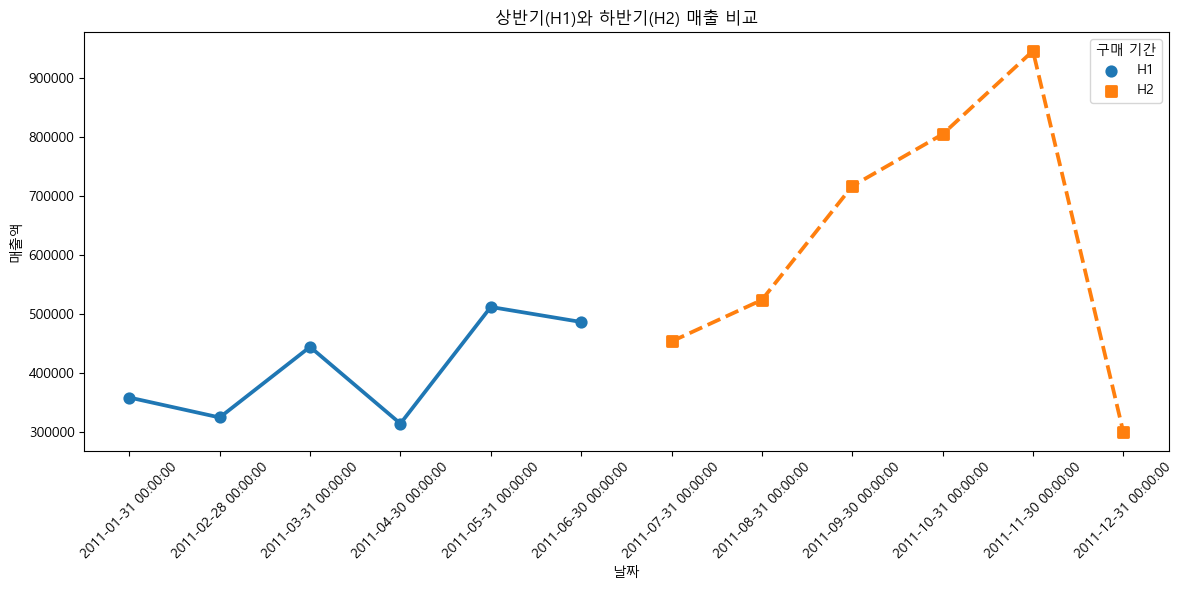

In [216]:
# VIP 고객 별로 특정 월, 특정 주기에 구매한 패턴이 있는지?
rfm = pd.read_csv('./rfm.csv')
vip = rfm[rfm['RFM_class'] == 'platinum']['CustomerID'].unique().tolist()

vip_sales = monthly_sales[monthly_sales.index.isin(vip)]

half_years = {
    'H1' : vip_sales.iloc[:, 1:7].sum(axis=0),
    'H2' : vip_sales.iloc[:, 7:].sum(axis=0)
}

half_years_df = pd.DataFrame(half_years)

# 긴 형식으로 변환
half_years_df = half_years_df.reset_index().melt(id_vars='InvoiceYM', value_vars=['H1', 'H2'], var_name='Half', value_name='Sales')

# 시각화
plt.figure(figsize=(12, 6))

# 포인트 차트
sns.pointplot(data=half_years_df, x='InvoiceYM', y='Sales', hue='Half', markers=['o', 's'], linestyles=['-', '--'])
plt.title('상반기(H1)와 하반기(H2) 매출 비교')
plt.xlabel('날짜')
plt.ylabel('매출액')
plt.xticks(rotation=45)
plt.legend(title='구매 기간')
plt.tight_layout()
plt.show()

In [191]:
# 데이터 정규화 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(monthly_sales)
scaled_data = pd.DataFrame(scaled_data, columns = monthly_sales.columns, index=monthly_sales.index)
scaled_data.head()

InvoiceYM,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31
CustomerID,,,,,,,,,,,,,
12346.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,0.025572,0.006159,0.000000,0.0,0.029544,0.0,0.009116,0.0,0.014504,0.000000,0.024569,0.000000,0.001334
12348.0,0.032075,0.002947,0.000000,0.0,0.017041,0.0,0.000000,0.0,0.000000,0.004111,0.000000,0.000000,0.000000
12349.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.063064,0.000000
12350.0,0.000000,0.000000,0.014668,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


### 고객 이탈 머신러닝

In [308]:
df_valid.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'diffDays',
       'isRegistered', 'InvoiceCode', 'isCancel', 'InvoiceYear',
       'InvoiceMonth', 'InvoiceDay', 'InvoiceDow', 'InvoiceYM', 'InvoiceTime',
       'Invoicehour', 'InvoiceDateFirst', 'CohortIndex', 'InvoiceDateFirstYM',
       'Recency_x', 'Frequency_x', 'MonetaryValue_x', 'Length_x', 'Recency_y',
       'Frequency_y', 'MonetaryValue_y', 'Length_y'],
      dtype='object')

In [311]:
df_valid.drop(columns = ['Recency_y','Frequency_y','MonetaryValue_y','Length_y'], inplace=True)
df_valid.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,diffDays,...,InvoiceYM,InvoiceTime,Invoicehour,InvoiceDateFirst,CohortIndex,InvoiceDateFirstYM,Recency_x,Frequency_x,MonetaryValue_x,Length_x
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,302.0,...,2010-12,08:26:00,8,2010-12-01 08:26:00,1,2010-12,372,297,5391.21,1


In [322]:
# 최근 구매일 계싼 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           392692 non-null  object        
 1   StockCode           392692 non-null  object        
 2   Description         392692 non-null  object        
 3   Quantity            392692 non-null  int64         
 4   InvoiceDate         392692 non-null  datetime64[ns]
 5   UnitPrice           392692 non-null  float64       
 6   CustomerID          392692 non-null  float64       
 7   Country             392692 non-null  object        
 8   TotalPrice          392692 non-null  float64       
 9   diffDays            392692 non-null  float64       
 10  isRegistered        392692 non-null  bool          
 11  InvoiceCode         392692 non-null  object        
 12  isCancel            392692 non-null  bool          
 13  InvoiceYear         392692 no

In [319]:
df_valid['diffDays'].max()

374.0

In [323]:
# 최근 구매일 계산 
snapshot_date = df_valid['InvoiceDate'].max() + pd.DateOffset(1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [336]:
# 고객별 특성 생성 
customer_features = df_valid.groupby('CustomerID').agg({
    'Recency' : 'min', # 최근 구매일
    'Quantity' : 'sum', # 총 구매 수량
    'TotalPrice' : 'sum', # 총 구매 금액
    'InvoiceNo' : 'count' # 총 구매 횟수 
}).reset_index()

customer_features.rename(columns={'InvoiceNo' : 'Frequency'}, inplace=True)

# 이탈 여부 라벨 생성 
customer_features['Churn'] = (customer_features['Recency'] > 180).astype(int)

customer_features

,CustomerID,Recency,Quantity,TotalPrice,Frequency,Churn
0,12346.0,326,74215,77183.60,1,1
1,12347.0,2,2458,4310.00,182,0
2,12348.0,75,2341,1797.24,31,0
3,12349.0,19,631,1757.55,73,0
4,12350.0,310,197,334.40,17,1
...,...,...,...,...,...,...
4333,18280.0,278,45,180.60,10,1
4334,18281.0,181,54,80.82,7,1
4335,18282.0,8,103,178.05,12,0
4336,18283.0,4,1357,2045.53,721,0


In [337]:
customer_features[customer_features['Churn'] == 1]

,CustomerID,Recency,Quantity,TotalPrice,Frequency,Churn
0,12346.0,326,74215,77183.60,1,1
4,12350.0,310,197,334.40,17,1
6,12353.0,204,20,89.00,4,1
7,12354.0,232,530,1079.40,58,1
8,12355.0,214,240,459.40,13,1
...,...,...,...,...,...,...
4305,18239.0,219,795,1561.61,88,1
4313,18250.0,310,199,349.27,21,1
4325,18269.0,366,76,168.60,7,1
4333,18280.0,278,45,180.60,10,1


In [345]:
from sklearn.model_selection import train_test_split

# 특성과 라벨
X = customer_features.drop(['CustomerID', 'Churn','Recency'], axis=1)
y = customer_features['Churn']

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [347]:
from sklearn.linear_model import LogisticRegression

# 모델 훈련
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8056835637480799
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1054
           1       0.27      0.01      0.02       248

    accuracy                           0.81      1302
   macro avg       0.54      0.50      0.46      1302
weighted avg       0.71      0.81      0.73      1302



ROC AUC: 0.7915200159147946


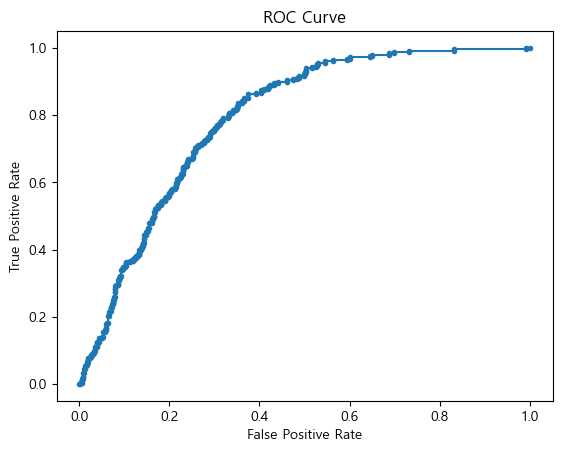

In [348]:
from sklearn.metrics import roc_auc_score, roc_curve

# ROC AUC
y_prob = model.predict_proba(X_test)[:, 1]
print(f"ROC AUC: {roc_auc_score(y_test, y_prob)}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [351]:
import lightgbm as lgb

# 모델 훈련
model = lgb.LGBMClassifier(scale_pos_weight=len(y) / (2 * np.sum(y)), random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 613, number of negative: 2423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 3036, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.201910 -> initscore=-1.374397
[LightGBM] [Info] Start training from score -1.374397
Accuracy: 0.738863287250384
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1054
           1       0.37      0.54      0.44       248

    accuracy                           0.74      1302
   macro avg       0.62      0.66      0.63      1302
weighted avg       0.78      0.74      0.76      1302



In [353]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# 모델 훈련
base_model = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8064516129032258
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1054
           1       0.46      0.08      0.14       248

    accuracy                           0.81      1302
   macro avg       0.64      0.53      0.52      1302
weighted avg       0.75      0.81      0.75      1302



In [356]:
import xgboost as xgb

# 모델 훈련
model = xgb.XGBClassifier(scale_pos_weight=len(y) / (2 * np.sum(y)), random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.7434715821812596
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1054
           1       0.36      0.44      0.39       248

    accuracy                           0.74      1302
   macro avg       0.61      0.63      0.62      1302
weighted avg       0.77      0.74      0.75      1302



In [359]:
from catboost import CatBoostClassifier

# 모델 훈련
model = CatBoostClassifier(scale_pos_weight=len(y) / (2 * np.sum(y)), random_state=42, verbose=0)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7549923195084486
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1054
           1       0.41      0.62      0.49       248

    accuracy                           0.75      1302
   macro avg       0.65      0.71      0.67      1302
weighted avg       0.81      0.75      0.77      1302



In [354]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 1.1 MB/s eta 0:01:55
   ---------------------------------------- 0.3/124.9 MB 2.5 MB/s eta 0:00:50
   ---------------------------------------- 0.4/124.9 MB 2.6 MB/s eta 0:00:48
   ---------------------------------------- 0.5/124.9 MB 2.6 MB/s eta 0:00:49
   ---------------------------------------- 0.7/124.9 MB 2.8 MB/s eta 0:00:45
   ---------------------------------------- 0.8/124.9 MB 2.7 MB/s eta 0:00:46
   ---------------------------------------- 1.0/124.9 MB 2.7 MB/s eta 0:00:46
   ---------------------------------------- 1.1/124.9 MB 2.6 MB/s eta 0:00:48
   ---------------------------------------- 1.2/124.9 MB 2.6 MB/s eta 0:00:49
   ---------------------------------------- 1.3/124.9 MB 2.7 MB/s eta 0:00:46
   ---------------------------------------- 1.5/124.9 MB 2.7 MB/s eta 0:00:46
    --------------------------------------- 1.8/124.9 MB 3.0 MB/s eta 0

In [358]:
!pip install catboost

   ---------------------------------------- 0.0/101.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.2 MB 2.4 MB/s eta 0:00:43
   ---------------------------------------- 0.3/101.2 MB 3.2 MB/s eta 0:00:33
   ---------------------------------------- 0.4/101.2 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 0.6/101.2 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 0.8/101.2 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 0.9/101.2 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 1.2/101.2 MB 3.6 MB/s eta 0:00:28
    --------------------------------------- 1.4/101.2 MB 3.6 MB/s eta 0:00:28
    --------------------------------------- 1.5/101.2 MB 3.6 MB/s eta 0:00:28
    --------------------------------------- 1.7/101.2 MB 3.6 MB/s eta 0:00:28
    --------------------------------------- 1.9/101.2 MB 3.7 MB/s eta 0:00:28
    --------------------------------------- 2.1/101.2 MB 3.7 MB/s eta 0

### 월별 매출 시계열


In [547]:
df_valid

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,diffDays,...,InvoiceYM,InvoiceTime,Invoicehour,InvoiceDateFirst,CohortIndex,InvoiceDateFirstYM,Recency,Frequency,MonetaryValue,Length
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,302.0,...,2010-12,08:26:00,8,2010-12-01 08:26:00,1,2010-12,372,297,5391.21,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,...,2010-12,08:26:00,8,2010-12-01 08:26:00,1,2010-12,372,297,5391.21,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,302.0,...,2010-12,08:26:00,8,2010-12-01 08:26:00,1,2010-12,372,297,5391.21,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,...,2010-12,08:26:00,8,2010-12-01 08:26:00,1,2010-12,372,297,5391.21,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,302.0,...,2010-12,08:26:00,8,2010-12-01 08:26:00,1,2010-12,372,297,5391.21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,1.0,...,2011-12,12:50:00,12,2011-08-18 15:44:00,5,2011-08,1,52,862.81,112
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,1.0,...,2011-12,12:50:00,12,2011-08-18 15:44:00,5,2011-08,1,52,862.81,112
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,1.0,...,2011-12,12:50:00,12,2011-08-18 15:44:00,5,2011-08,1,52,862.81,112
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,1.0,...,2011-12,12:50:00,12,2011-08-18 15:44:00,5,2011-08,1,52,862.81,112


## length 가 0인 고객들 추후 구매 예측

In [560]:
df_customers = df_valid.groupby(['InvoiceDate', 'CustomerID']).agg({'InvoiceNo' : 'count',
                                                   'TotalPrice' : 'sum'})
df_customers

InvoiceNo  TotalPrice
InvoiceDate CustomerID                       
2010-12-01  12431.0            14      358.25
            12433.0            73     1919.14
            12583.0            20      855.86
            12662.0            15      261.48
            12748.0             1        4.95
...                           ...         ...
2011-12-09  17428.0             3      415.60
            17490.0            22      730.70
            17581.0            35      984.68
            17754.0            23      191.63
            18102.0             1      469.44

[16763 rows x 2 columns]

In [561]:
df_customers=df_customers.rename(columns = {'InvoiceNo' : 'Frequency',
                               'TotalPrice' : 'MonetaryValue'})

In [564]:
df_customers = df_customers.reset_index()

In [565]:
df_customers.set_index('InvoiceDate')

,InvoiceDate,CustomerID,Frequency,MonetaryValue
0,2010-12-01,12431.0,14,358.25
1,2010-12-01,12433.0,73,1919.14
2,2010-12-01,12583.0,20,855.86
3,2010-12-01,12662.0,15,261.48
4,2010-12-01,12748.0,1,4.95
...,...,...,...,...
16758,2011-12-09,17428.0,3,415.60
16759,2011-12-09,17490.0,22,730.70
16760,2011-12-09,17581.0,35,984.68
16761,2011-12-09,17754.0,23,191.63


In [569]:
df = df_customers.set_index('InvoiceDate')
df = df.groupby(['CustomerID', pd.Grouper(freq='M')]).sum().reset_index()

In [584]:
df

,CustomerID,InvoiceDate,Frequency,MonetaryValue
0,12346.0,2011-01-31,1,77183.60
1,12347.0,2010-12-31,31,711.79
2,12347.0,2011-01-31,29,475.39
3,12347.0,2011-04-30,24,636.25
4,12347.0,2011-06-30,18,382.52
...,...,...,...,...
13049,18283.0,2011-10-31,38,112.99
13050,18283.0,2011-11-30,209,637.71
13051,18283.0,2011-12-31,50,208.00
13052,18287.0,2011-05-31,29,765.28


In [586]:
customers_with_zero_length = df[df['CustomerID'].isin(lt)]
customers_with_zero_length

,CustomerID,InvoiceDate,Frequency,MonetaryValue
0,12346.0,2011-01-31,1,77183.60
12,12349.0,2011-11-30,73,1757.55
13,12350.0,2011-02-28,17,334.40
18,12353.0,2011-05-31,4,89.00
19,12354.0,2011-04-30,58,1079.40
...,...,...,...,...
13035,18276.0,2011-10-31,14,335.86
13036,18277.0,2011-10-31,8,110.38
13037,18278.0,2011-09-30,9,173.90
13038,18280.0,2011-03-31,10,180.60


In [590]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# 고객별로 시계열 데이터 준비 (예: CustomerID 12347)
def prepare_customer_data(df, customer_id):
    customer_data = df[df['CustomerID'] == customer_id].set_index('InvoiceDate').resample('M').sum()
    customer_data = customer_data[['Frequency']].fillna(0)
    return customer_data

# 시계열 예측 모델을 적용하는 함수
def forecast_customer_purchase(customer_id, df):
    customer_data = prepare_customer_data(df, customer_id)
    
    # ARIMA 모델 적용
    model = ARIMA(customer_data, order=(5,1,0))
    model_fit = model.fit()
    
    # 예측 (예: 3개월 후 예측)
    forecast = model_fit.forecast(steps=3)
    return forecast

In [591]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Length가 0인 고객들에 대해 예측 수행
for customer_id in customers_with_zero_length['CustomerID'].unique():
    forecast = forecast_customer_purchase(customer_id, df)
    print(f"Customer {customer_id} forecasted purchase frequencies for next 3 months:")
    print(forecast)

C:\Users\jkj12\miniconda3\envs\ds_study\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\jkj12\miniconda3\envs\ds_study\lib\site-packages\numpy\core\fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\jkj12\miniconda3\envs\ds_study\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\jkj12\miniconda3\envs\ds_study\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


LinAlgError: Schur decomposition solver error.

In [583]:
lt = rfm[rfm['Length'] == 0].index.tolist()
lt = list(set(lt))

In [555]:
df_valid['InvoiceDate'] = pd.to_datetime(df_valid['InvoiceDate'])

df_valid['InvoiceDate'] = df_valid['InvoiceDate'].dt.date
df_valid['InvoiceDate'] = pd.to_datetime(df_valid['InvoiceDate'])
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 392691
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           392692 non-null  int64         
 1   StockCode           392692 non-null  object        
 2   Description         392692 non-null  object        
 3   Quantity            392692 non-null  int64         
 4   InvoiceDate         392692 non-null  datetime64[ns]
 5   UnitPrice           392692 non-null  float64       
 6   CustomerID          392692 non-null  float64       
 7   Country             392692 non-null  object        
 8   TotalPrice          392692 non-null  float64       
 9   diffDays            392692 non-null  float64       
 10  isRegistered        392692 non-null  bool          
 11  InvoiceCode         392692 non-null  object        
 12  isCancel            392692 non-null  bool          
 13  InvoiceYear         392692 non-nul

In [556]:
df_valid['InvoiceDate']

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
392687   2011-12-09
392688   2011-12-09
392689   2011-12-09
392690   2011-12-09
392691   2011-12-09
Name: InvoiceDate, Length: 392692, dtype: datetime64[ns]

In [554]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 392691
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   InvoiceNo           392692 non-null  int64  
 1   StockCode           392692 non-null  object 
 2   Description         392692 non-null  object 
 3   Quantity            392692 non-null  int64  
 4   InvoiceDate         392692 non-null  object 
 5   UnitPrice           392692 non-null  float64
 6   CustomerID          392692 non-null  float64
 7   Country             392692 non-null  object 
 8   TotalPrice          392692 non-null  float64
 9   diffDays            392692 non-null  float64
 10  isRegistered        392692 non-null  bool   
 11  InvoiceCode         392692 non-null  object 
 12  isCancel            392692 non-null  bool   
 13  InvoiceYear         392692 non-null  int64  
 14  InvoiceMonth        392692 non-null  int64  
 15  InvoiceDay          392692 non-null  in